# Predictive Analytics for Real Estate Investment: A Regression Model Approach for Surprise Housing in the Australian Market

## Problem Statement:

Surprise Housing, a US-based real estate company, has set its sights on entering the Australian market with a strategic approach to property investment. Leveraging data analytics, the company aims to identify lucrative opportunities by acquiring houses below market value and selling them at a premium. To facilitate this, Surprise Housing has gathered a comprehensive dataset from Australian house sales, presented in the provided CSV file.

The task at hand is to develop a regression model with regularization techniques to predict the actual values of potential properties. This predictive model will play a pivotal role in aiding decision-making on whether to invest in prospective properties or not. The primary objectives include identifying the significant variables influencing house prices and assessing how effectively these variables explain the variation in house prices.

Additionally, the assignment involves determining the optimal values of lambda for both ridge and lasso regression, contributing to the precision of the predictive model.

## Business Goal:

The ultimate goal is to create a robust model that accurately captures the dynamic relationship between independent variables and house prices. This model will serve as a valuable tool for management, enabling a nuanced understanding of price variations and empowering strategic decision-making. By concentrating efforts on areas with high return potential, Surprise Housing aims to optimize its investment strategy in the Australian market. Furthermore, the model will provide insights into the unique pricing dynamics of this new market, offering a comprehensive understanding for effective market penetration and sustained success.

## Solution Overview:

The proposed solution is structured into distinct sections to ensure a comprehensive approach to addressing the business challenge. The key components of the solution include:

1. Data Understanding and Exploration
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Preparation
5. Model Building and Evaluation
6. Inferences
7. Business Recommendations

## 1. Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Reading the dataset
housing_df = pd.read_csv('train.csv')

In [4]:
# Inspecting the head
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
# Shape of the dataset
housing_df.shape

(1460, 81)

In [6]:
# Summary of the dataset: 1460 rows, 81 columns, some missing values present
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### It appears that certain columns have missing values, and we will address these gaps during the Data Cleaning phase.

In [7]:
housing_df.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

## 2. Data Cleaning

#### Checking for unique values in the columns

In [8]:
housing_df.nunique().sort_values(ascending = False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
Condition1          9
OverallCond         9
SaleType            9
PoolArea            8
RoofMatl            8
HouseStyle          8
BedroomAbvGr        8
Condition2          8
Functional          7
GarageType          6
SaleCondition       6
Heating             6
BsmtFinType2        6
BsmtFinType1        6
RoofStyle           6
Foundation

#### Dropping the `Id` column because it contains 1460 unique values and will not contribute any meaningful information to our linear model.

In [9]:
housing_df.drop(['Id'], axis = 1, inplace = True)

In [10]:
# Verifying the removal of 'Id' column by inspecting the head
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

#### Checking for percentage of null/missing values in the dataset

In [11]:
# Creating a dataframe containing all feature names along with the % of null values present in the column
null_df = pd.DataFrame(round(100 * (housing_df.isnull().sum() / len(housing_df)), 2).sort_values(ascending = False), columns=["Null %"])
null_df.index.name = 'Features'

In [12]:
# Inspecting the null dataframe
null_df

Null %
Features             
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
MSSubClass       0.00
Fireplaces       0.00
Functional       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
TotRmsAbvGrd     0.00
GarageCars       0.00
GrLivArea        0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
BsmtFullBath     0.00
CentralAir       0.00
LowQualFinSF     0.00
Neighborhood     0.00
OverallCond      0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
LandSlope        0.00
2ndFlrSF         0.00
LotConfig        0.00
Utilities        0.00
LandContour      0.00
LotShape         0.00
Street           0.00
LotArea          0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtFinSF1       0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
MSZoning         0.00
1stFlrSF         0.00
SalePrice        0.00

#### It appears that numerous features have null values in their columns. Let's address those and reexamine the dataframe.

In [13]:
# dataframe with features having null values
null_df = null_df[null_df["Null %"] > 0]
null_df

Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtCond        2.53
BsmtQual        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

#### `Alley`, `Fence`, `FireplaceQu`, `MiscFeature`, and `PoolQC` exhibit a missing value percentage of at least 47%. To enhance the robustness of our model-building process and mitigate data skewness, we will eliminate these columns, as they are not anticipated to contribute significantly to our modeling objectives.

In [14]:
# Dropping these features from the housing dataframe
housing_df.drop(['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'], axis = 1, inplace = True)

In [15]:
# Removing those feature indexes from the null dataframe as well
null_df = null_df.drop(['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'])

In [16]:
# Inspecting the null dataframe again
null_df

Null %
Features            
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtCond        2.53
BsmtQual        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

In [17]:
# Inspecting the housing dataframe remaining features and their types
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [18]:
# MSSubClass, MoSold is of object type and it is wrongly interpreted as integer. Changing its type to categorical variable
housing_df['MSSubClass'] = housing_df['MSSubClass'].astype('object')
housing_df['MoSold'] = housing_df['MoSold'].astype('object')

# MSSubClass, OverallCond, OverallQual and MoSold are categorical variables.
# Replacing the categorical code values in those columns with the actual values as per data dictionary

housing_df['MSSubClass'] = housing_df['MSSubClass'].replace({
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

housing_df['OverallCond'] = housing_df['OverallCond'].replace({
    10:'Very Excellent',
    9:'Excellent',
    8:'Very Good',
    7:'Good',
    6:'Above Average',
    5:'Average',
    4:'Below Average',
    3:'Fair',
    2:'Poor',
    1:'Very Poor'
})

housing_df['OverallQual'] = housing_df['OverallQual'].replace({
    10:'Very Excellent',
    9:'Excellent',
    8:'Very Good',
    7:'Good',
    6:'Above Average',
    5:'Average',
    4:'Below Average',
    3:'Fair',
    2:'Poor',
    1:'Very Poor'
})

housing_df['MoSold'] = housing_df['MoSold'].replace({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
})

In [19]:
# Verifying the replacement values by inspecting the head
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           Good     Average       2003   
1       Norm     1Fam     1Story  Above Average   Very Good       1976   
2       Norm     1Fam     2Story           Good     Average       2001   
3       Norm     1Fam     2Story           Good     Average       1915   
4       Norm     1Fam     2Story      Very Good     Average       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          Gd             6        Typ           1     At

#### Checking for duplicates in the housing dataframe

In [20]:
housing_df.duplicated().sum()

0

#### The housing dataframe appears to be in good shape. No duplicate values are found in the dataset.

### Data Imputation

According to the data dictionary, certain features are designated as `NA`, and it's crucial to note that these NA values carry distinct meanings. The pandas library may misinterpret them as typical NA values, leading to an inaccurate calculation of null percentages. In reality, these values signify specific conditions. The following is a list of features along with their corresponding non-applicable (NA) values enclosed in parentheses:

- `Alley` (No Alley Access)$^*$
- `BsmtExposure` (No Basement)
- `BsmtFinType1` (No Basement)
- `BsmtFinType2` (No Basement)
- `BsmtQual` (No Basement)
- `Fence` (No Fence)$^*$
- `FireplaceQu` (No Fireplace)$^*$
- `GarageCond` (No Garage)
- `GarageFinish` (No Garage)
- `GarageQual` (No Garage)
- `GarageType` (No Garage)
- `MasVnrType` (None)
- `MiscFeature` (None)$^*$
- `PoolQC` (No Pool)$^*$

*****Features marked with an asterisk ($^*$) have already been removed from the dataframe.*****

#### In order to ensure data consistency, we will replace the NA values in the specified features with 'None' in the housing dataframe.

In [21]:
cols_with_distinct_NA_values = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                'BsmtQual', 'GarageCond', 'GarageFinish', 'GarageQual',
                                'GarageType', 'MasVnrType']
for col in cols_with_distinct_NA_values:
    housing_df[col].replace({ pd.NA: 'None' }, inplace = True)

In [22]:
# Inspect the numerical variables
housing_df.sort_index(axis = 1).describe()

1stFlrSF     2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1162.626712   346.992466     3.409589      2.866438   443.639726   
std     386.587738   436.528436    29.317331      0.815778   456.098091   
min     334.000000     0.000000     0.000000      0.000000     0.000000   
25%     882.000000     0.000000     0.000000      2.000000     0.000000   
50%    1087.000000     0.000000     0.000000      3.000000   383.500000   
75%    1391.250000   728.000000     0.000000      3.000000   712.250000   
max    4692.000000  2065.000000   508.000000      8.000000  5644.000000   

        BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch  \
count  1460.000000   1460.000000   1460.000000  1460.000000    1460.000000   
mean     46.549315      0.425342      0.057534   567.240411      21.954110   
std     161.319273      0.518911      0.238753   441.866955      61.119149   
min       0.000000      0.000000      0.000000     0.000000       0.000000   
25%       0.000000      0.000000      0.000000   223.000000       0.000000   
50%       0.000000      0.000000      0.000000   477.500000       0.000000   
75%       0.000000      1.000000      0.000000   808.000000       0.000000   
max    1474.000000      3.000000      2.000000  2336.000000     552.000000   

        Fireplaces     FullBath   GarageArea   GarageCars  GarageYrBlt  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1379.000000   
mean      0.613014     1.565068   472.980137     1.767123  1978.506164   
std       0.644666     0.550916   213.804841     0.747315    24.689725   
min       0.000000     0.000000     0.000000     0.000000  1900.000000   
25%       0.000000     1.000000   334.500000     1.000000  1961.000000   
50%       1.000000     2.000000   480.000000     2.000000  1980.000000   
75%       1.000000     2.000000   576.000000     2.000000  2002.000000   
max       3.000000     3.000000  1418.000000     4.000000  2010.000000   

         GrLivArea     HalfBath  KitchenAbvGr        LotArea  LotFrontage  \
count  1460.000000  1460.000000   1460.000000    1460.000000  1201.000000   
mean   1515.463699     0.382877      1.046575   10516.828082    70.049958   
std     525.480383     0.502885      0.220338    9981.264932    24.284752   
min     334.000000     0.000000      0.000000    1300.000000    21.000000   
25%    1129.500000     0.000000      1.000000    7553.500000    59.000000   
50%    1464.000000     0.000000      1.000000    9478.500000    69.000000   
75%    1776.750000     1.000000      1.000000   11601.500000    80.000000   
max    5642.000000     2.000000      3.000000  215245.000000   313.000000   

       LowQualFinSF   MasVnrArea       MiscVal  OpenPorchSF     PoolArea  \
count   1460.000000  1452.000000   1460.000000  1460.000000  1460.000000   
mean       5.844521   103.685262     43.489041    46.660274     2.758904   
std       48.623081   181.066207    496.123024    66.256028    40.177307   
min        0.000000     0.000000      0.000000     0.000000     0.000000   
25%        0.000000     0.000000      0.000000     0.000000     0.000000   
50%        0.000000     0.000000      0.000000    25.000000     0.000000   
75%        0.000000   166.000000      0.000000    68.000000     0.000000   
max      572.000000  1600.000000  15500.000000   547.000000   738.000000   

           SalePrice  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF   WoodDeckSF  \
count    1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean   180921.195890    15.060959      6.517808  1057.429452    94.244521   
std     79442.502883    55.757415      1.625393   438.705324   125.338794   
min     34900.000000     0.000000      2.000000     0.000000     0.000000   
25%    129975.000000     0.000000      5.000000   795.750000     0.000000   
50%    163000.000000     0.000000      6.000000   991.500000     0.000000   
75%    214000.000000     0.000000      7.00000

In [23]:
# Impute missing values for LotFrontage, MasVnrArea and GarageYrBlt with the median
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].median())
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].median())

In [24]:
# Inspect the categorical variables
housing_df.sort_index(axis = 1).select_dtypes(include = 'object')

BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
0        1Fam       TA           No          GLQ          Unf       Gd   
1        1Fam       TA           Gd          ALQ          Unf       Gd   
2        1Fam       TA           Mn          GLQ          Unf       Gd   
3        1Fam       Gd           No          ALQ          Unf       TA   
4        1Fam       TA           Av          GLQ          Unf       Gd   
5        1Fam       TA           No          GLQ          Unf       Gd   
6        1Fam       TA           Av          GLQ          Unf       Ex   
7        1Fam       TA           Mn          ALQ          BLQ       Gd   
8        1Fam       TA           No          Unf          Unf       TA   
9      2fmCon       TA           No          GLQ          Unf       TA   
10       1Fam       TA           No          Rec          Unf       TA   
11       1Fam       TA           No          GLQ          Unf       Ex   
12       1Fam       TA           No          ALQ          Unf       TA   
13       1Fam       TA           Av          Unf          Unf       Gd   
14       1Fam       TA           No          BLQ          Unf       TA   
15       1Fam       TA           No          Unf          Unf       TA   
16       1Fam       TA           No          ALQ          Unf       TA   
17     Duplex     None         None         None         None     None   
18       1Fam       TA           No          GLQ          Unf       TA   
19       1Fam       TA           No          LwQ          Unf       TA   
20       1Fam       TA           Av          Unf          Unf       Ex   
21       1Fam       TA           No          Unf          Unf       TA   
22       1Fam       TA           No          Unf          Unf       Gd   
23     TwnhsE       TA           No          GLQ          Unf       Gd   
24       1Fam       TA           Mn          Rec          ALQ       TA   
25       1Fam       TA           No          Unf          Unf       Gd   
26       1Fam       TA           Mn          BLQ          Rec       TA   
27       1Fam       TA           No          GLQ          Unf       Ex   
28       1Fam       TA           Gd          BLQ          Unf       TA   
29       1Fam       TA           No          Unf          Unf       TA   
30       1Fam       TA           No          Unf          Unf       TA   
31       1Fam       TA           No          Unf          Unf       TA   
32       1Fam       TA           Av          Unf          Unf       Ex   
33       1Fam       TA           No          Rec          Unf       TA   
34     TwnhsE       TA           No          GLQ          Unf       Ex   
35       1Fam       TA           Av          Unf          Unf       Ex   
36       1Fam       TA           No          Unf          Unf       Gd   
37       1Fam       TA           No          Rec          Unf       TA   
38       1Fam       TA           No          GLQ          Unf       TA   
39     Duplex     None         None         None         None     None   
40       1Fam       TA           No          Rec          Unf       TA   
41       1Fam       TA           Gd          BLQ          Unf       TA   
42       1Fam       TA           Av          ALQ          LwQ       Gd   
43       1Fam       TA           Av          LwQ          BLQ       Gd   
44       1Fam       TA           No          ALQ          BLQ       TA   
45     TwnhsE       TA           No          GLQ          Unf       Ex   
46       1Fam       TA           No          GLQ          Unf       Ex   
47       1Fam       TA           Av          GLQ          Unf       Gd   
48     2fmCon       TA           No          Unf          Unf       TA   
49       1Fam       TA           No          BLQ          Unf       TA   
50       1Fam       TA           Av          GLQ          Unf       Gd   
51       1Fam       TA           No          Unf          Unf       TA   
52     Duplex       TA           Gd          LwQ          GLQ       Gd   
53       

In [25]:
# Impute missing values for the specified categorical columns with 'mode'
for col in ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'GarageCond',
             'GarageFinish', 'GarageQual', 'GarageType', 'MasVnrType']:
    housing_df[col] = housing_df[col].fillna(housing_df[col].mode()[0])

In [26]:
# Checking whether there are any remaining missing values in the columns after the imputation process
housing_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [27]:
# Now, examining the percentage of null values in all columns after the imputation process
null_df = pd.DataFrame(round(100 * (housing_df.isnull().sum() / len(housing_df)), 2).sort_values(ascending = False), columns=["Null %"])
null_df.index.name = 'Features'
null_df

Null %
Features             
MSSubClass        0.0
GarageYrBlt       0.0
Fireplaces        0.0
Functional        0.0
TotRmsAbvGrd      0.0
KitchenQual       0.0
KitchenAbvGr      0.0
BedroomAbvGr      0.0
HalfBath          0.0
FullBath          0.0
BsmtHalfBath      0.0
BsmtFullBath      0.0
GrLivArea         0.0
LowQualFinSF      0.0
2ndFlrSF          0.0
1stFlrSF          0.0
Electrical        0.0
GarageType        0.0
GarageFinish      0.0
HeatingQC         0.0
GarageCars        0.0
SaleCondition     0.0
SaleType          0.0
YrSold            0.0
MoSold            0.0
MiscVal           0.0
PoolArea          0.0
ScreenPorch       0.0
3SsnPorch         0.0
EnclosedPorch     0.0
OpenPorchSF       0.0
WoodDeckSF        0.0
PavedDrive        0.0
GarageCond        0.0
GarageQual        0.0
GarageArea        0.0
CentralAir        0.0
Heating           0.0
MSZoning          0.0
YearRemodAdd      0.0
OverallCond       0.0
OverallQual       0.0
HouseStyle        0.0
BldgType          0.0
Condition2        0.0
Condition1        0.0
Neighborhood      0.0
LandSlope         0.0
LotConfig         0.0
Utilities         0.0
LandContour       0.0
LotShape          0.0
Street            0.0
LotArea           0.0
LotFrontage       0.0
YearBuilt         0.0
RoofStyle         0.0
TotalBsmtSF       0.0
RoofMatl          0.0
BsmtUnfSF         0.0
BsmtFinSF2        0.0
BsmtFinType2      0.0
BsmtFinSF1        0.0
BsmtFinType1      0.0
BsmtExposure      0.0
BsmtCond          0.0
BsmtQual          0.0
Foundation        0.0
ExterCond         0.0
ExterQual         0.0
MasVnrArea        0.0
MasVnrType        0.0
Exterior2nd       0.0
Exterior1st       0.0
SalePrice         0.0

#### Given that the null dataframe is empty, we can confidently affirm the success of the imputation process.

### Derived Columns

In [28]:
# Create a column for the total area in square feet, considering overall area for all floors and basement
housing_df['Total_Sqr_Footage'] = (housing_df['BsmtFinSF1'] + housing_df['BsmtFinSF2'] + housing_df['1stFlrSF'] + housing_df['2ndFlrSF'])

# Create a derived column for the total number of bathrooms
housing_df['Total_Bathrooms'] = (housing_df['FullBath'] + (0.5 * housing_df['HalfBath']) + housing_df['BsmtFullBath'] + (0.5 * housing_df['BsmtHalfBath']))

# Create a derived column for the total porch area
housing_df['Total_Porch_SF'] = (housing_df['OpenPorchSF'] + housing_df['3SsnPorch'] + housing_df['EnclosedPorch'] + housing_df['ScreenPorch'] + housing_df['WoodDeckSF'])

# Create a derived column for the age of the property
housing_df['PropertyAge'] = housing_df['YearRemodAdd'] - housing_df['YearBuilt']

In [29]:
# Drop the specified extra columns
extra_cols_to_drop = ['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath',
                      'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch',
                      'ScreenPorch', 'WoodDeckSF', 'YearRemodAdd', 'YearBuilt']
housing_df.drop(extra_cols_to_drop, axis = 1, inplace = True)

# Verify the updated shape of the dataset
housing_df.shape

(1460, 64)

In [30]:
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond RoofStyle  \
0       Norm     1Fam     2Story           Good     Average     Gable   
1       Norm     1Fam     1Story  Above Average   Very Good     Gable   
2       Norm     1Fam     2Story           Good     Average     Gable   
3       Norm     1Fam     2Story           Good     Average     Gable   
4       Norm     1Fam     2Story      Very Good     Average     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0      PConc       Gd       TA           No          GLQ          Unf   
1     CBlock       Gd       TA           Gd          ALQ          Unf   
2      PConc       Gd       TA           Mn          GLQ          Unf   
3     BrkTil       TA       Gd           No          ALQ          Unf   
4      PConc       Gd       TA           Av          GLQ          Unf   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0        150          856    GasA        Ex          Y      SBrkr   
1        284         1262    GasA        Ex          Y      SBrkr   
2        434          920    GasA        Ex          Y      SBrkr   
3        540          756    GasA        Gd          Y      SBrkr   
4        490         1145    GasA        Ex          Y      SBrkr   

   LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0       1710             3             1          Gd   
1             0       1262             3             1          TA   
2             0       1786             3             1          Gd   
3             0       1717             3             1          Gd   
4             0       2198             4             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  \
0             8        Typ           0     Attchd       2003.0          RFn   
1             6        Typ           1     Attchd       1976.0          RFn   
2             6        Typ           1     Attchd       2001.0          RFn   
3             7        Typ           1     Detchd       1998.0          Unf   
4             9        Typ           1     Attchd       2000.0          RFn   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  PoolArea  MiscVal  \
0           2         548         TA         TA          Y         0        0   
1           2         460         TA         TA          Y         0        0   
2           2         608         TA         TA          Y         0        0   
3           3         642         TA         TA          Y         0        0   
4    

In [31]:
# Inspecting the dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   object 
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   Street             1460 non-null   object 
 5   LotShape           1460 non-null   object 
 6   LandContour        1460 non-null   object 
 7   Utilities          1460 non-null   object 
 8   LotConfig          1460 non-null   object 
 9   LandSlope          1460 non-null   object 
 10  Neighborhood       1460 non-null   object 
 11  Condition1         1460 non-null   object 
 12  Condition2         1460 non-null   object 
 13  BldgType           1460 non-null   object 
 14  HouseStyle         1460 non-null   object 
 15  OverallQual        1460 non-null   object 
 16  OverallCond        1460 

In [32]:
# With the correct placement of data types for all features, confirm the shape of the dataset.
housing_df.shape

(1460, 64)

## 3. Exploratory Data Analysis

### Utility Functions

In [33]:
def plot_graph(df, analysis_type, column_type, columns):
    """
    Perform univariate or bivariate analysis on specified columns of a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - analysis_type (str): Type of analysis ('univariate' or 'bivariate').
    - column_type (str): Type of columns ('numerical' or 'categorical').
    - columns (list): List of column names to analyze.

    Returns:
    - None: Displays the plots based on the analysis.

    Example:
    - analyze_data(housing_df, 'univariate', 'categorical', categorical_columns)
    - analyze_data(housing_df, 'univariate', 'numerical', numerical_columns)
    - analyze_data(housing_df, 'bivariate', 'categorical', categorical_columns)
    """
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2

    if analysis_type == 'univariate':
        if column_type == 'categorical':
            plt.figure(figsize=(16, 8 * num_rows))
            count = 0

            for col in columns:
                count += 1
                plt.subplot(num_rows, 2, count)
                sns.countplot(y = df[col], order = df[col].value_counts().sort_values().index)
                plt.title(str(col), fontsize = 14)

            plt.tight_layout()
            plt.show()

        elif column_type == 'numerical':
            plt.figure(figsize=(10, 8 * num_rows))
            count = 0

            for col in columns:
                if count < num_cols:
                    count += 1
                    plt.subplot(num_rows, 2, count)
                    plt.title(str(col))
                    sns.distplot(df[col])

            plt.tight_layout()
            plt.show()

    elif analysis_type == 'bivariate' and column_type == 'categorical':
        plt.figure(figsize=(16, 8 * num_rows))
        count = 0

        for col in columns:
            count += 1
            plt.subplot(num_rows, 2, count)
            sns.boxplot(data = df, x = df[col], y = 'SalePrice')
            plt.title(f"{str(col)} vs. SalePrice", fontsize = 14)
            plt.xticks(rotation = 90 if df[col].nunique() > 5 else 0)

        plt.tight_layout()
        plt.show()

In [34]:
def plot_correlation_matrix(df, target_column, top_n = None, cmap = 'coolwarm'):
    """
    Plots a correlation matrix heatmap for the top 'top_n' variables with the highest correlation
    with the specified target column. If 'top_n' is not provided, it includes all numerical variables.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - target_column (str): The target column for which correlations will be analyzed.
    - top_n (int or None): Number of variables with the highest correlation to display. Default is None.

    Returns:
    None (displays the heatmap).
    """
    plt.figure(figsize=(25, 20))

    # Create the correlation matrix
    corrmat = df.corr()

    # Select the top 'top_n' variables with the highest correlation with the target column
    if top_n is not None:
        cols = corrmat.nlargest(top_n, target_column)[target_column].index
    else:
    # Select all columns if 'top_n' is not provided
        cols = corrmat.columns

    # Plot the correlation matrix
    sns.heatmap(df[cols].corr(), annot = True, cmap = cmap)

    plt.title(f'Correlation Matrix Heatmap ({len(cols)} variables with {target_column})')
    plt.show()

In [35]:
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a regression model using various metrics.

    Parameters:
    - model: The regression model to be evaluated.
    - X_train: Training feature matrix.
    - y_train: Training target variable.
    - X_test: Testing feature matrix.
    - y_test: Testing target variable.

    Returns:
    - metric: A list containing the calculated metrics in the order of R2 score for training,
              R2 score for testing, RSS for training, RSS for testing, RMSE for training,
              and RMSE for testing.

    """
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    metric = []

    # R2 score for training
    r2_train = r2_score(y_train, y_pred_train)
    print("R2 Score (Train): %.3f" % r2_train)
    metric.append(round(r2_train, 3))

    # R2 score for test
    r2_test = r2_score(y_test, y_pred_test)
    print("R2 Score (Test): %.3f" % r2_test)
    metric.append(round(r2_test, 3))

    # Residual Sum of Squares (RSS) for training
    rss_train = np.sum(np.square(y_train - y_pred_train))
    print("RSS (Train): %.3f" % rss_train)
    metric.append(round(rss_train, 3))

    # Residual Sum of Squares (RSS) for test
    rss_test = np.sum(np.square(y_test - y_pred_test))
    print("RSS (Test): %.3f" % rss_test)
    metric.append(round(rss_test, 3))

    # Root Mean Squared Error (RMSE) for training
    rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
    print("RMSE (Train): %.3f" % rmse_train)
    metric.append(round(rmse_train, 3))

    # Root Mean Squared Error (RMSE) for test
    rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
    print("RMSE (Test): %.3f" % rmse_test)
    metric.append(round(rmse_test, 3))
    
    return metric

In [36]:
def plot_r2_vs_alpha(df):
    """
    Plot R2 score against alpha values for both train and test sets.

    Parameters:
    - df: DataFrame with columns 'param_alpha', 'mean_train_score', and 'mean_test_score'
    """
    plt.plot(df['param_alpha'], df['mean_train_score'], label = 'Train')
    plt.plot(df['param_alpha'], df['mean_test_score'], label = 'Test')
    plt.xlabel('alpha')
    plt.ylabel('R2 score')
    plt.xscale('log')
    plt.legend()
    plt.show()

### Univariate Analysis

In [37]:
# Dividing the columns into numerical and categorical categories for analysis through EDA and visualization
numerical_columns = housing_df.select_dtypes(include = ['int64', 'float64']).columns.tolist()

categorical_columns = housing_df.select_dtypes(include = ['object']).columns.tolist()

In [38]:
print("Numerical Columns:", numerical_columns)
print("Total count:", len(numerical_columns))

Numerical Columns: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice', 'Total_Sqr_Footage', 'Total_Bathrooms', 'Total_Porch_SF', 'PropertyAge']
Total count: 22


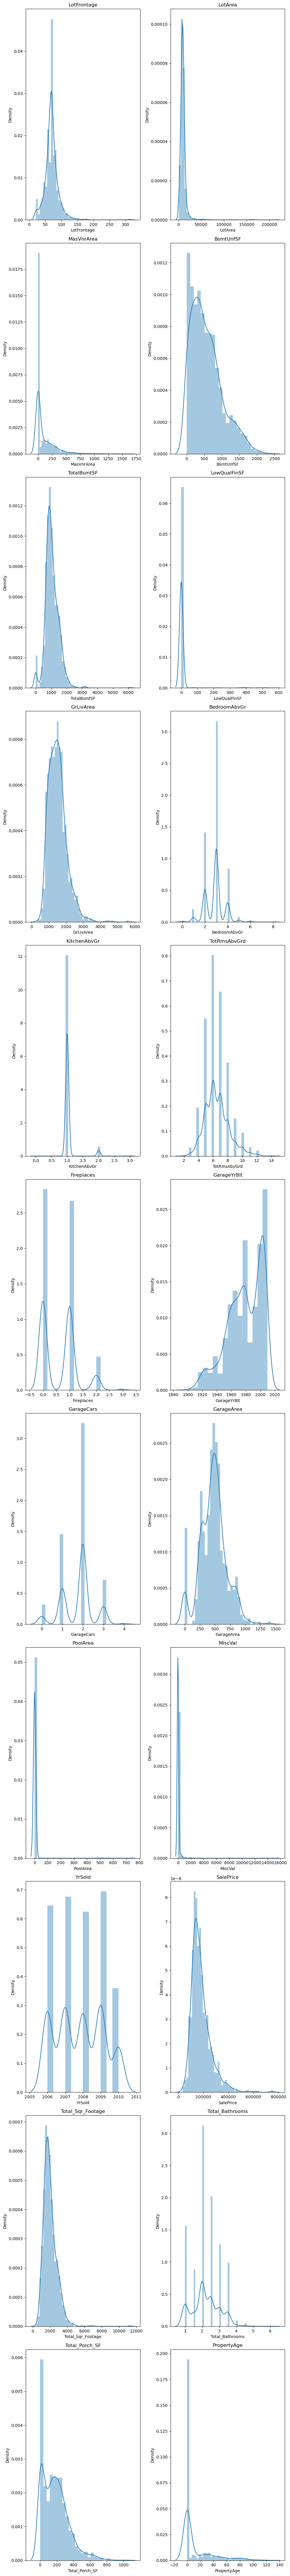

In [39]:
# Univariate analysis of numerical columns using boxplot and distribution plot
plot_graph(housing_df, 'univariate', 'numerical', numerical_columns)

In [40]:
print("Categorical Columns:", categorical_columns)
print("Total count:", len(categorical_columns))

Categorical Columns: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']
Total count: 42


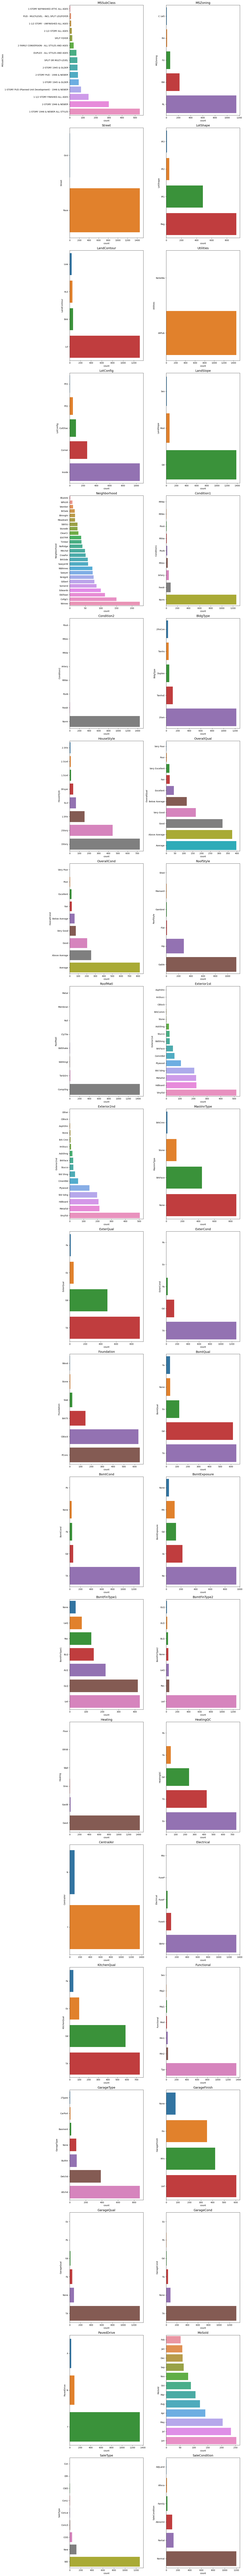

In [41]:
# Univariate analysis of categorical columns using countplot
plot_graph(housing_df, 'univariate', 'categorical', categorical_columns)

#### Eliminating columns that mainly contain a single value, as they contribute little to the model-building process.

In [42]:
# Removing below columns post visual analysis of numerical and categorical variables
unimportant_cols = ['Condition2', 'Functional', 'Heating', 'KitchenAbvGr', 'LandSlope', 'LowQualFinSF',
                    'MiscVal', 'PoolArea', 'RoofMatl', 'Street', 'Utilities']

In [43]:
# We will remove these columns as they are predominantly characterized by a single value, contributing minimal
# additional information to our model.
housing_df = housing_df.drop(unimportant_cols, axis = 1)

### Outlier Treatment

In [44]:
# Inspect the dataframe at different percentiles
housing_df.describe(percentiles = [.05, .10, .25, .50, .75, .90, .95, .99])

LotFrontage        LotArea   MasVnrArea    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   567.240411  1057.429452   
std      22.027677    9981.264932   180.731373   441.866955   438.705324   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
5%       35.950000    3311.700000     0.000000     0.000000   519.300000   
10%      49.000000    5000.000000     0.000000    74.900000   636.900000   
25%      60.000000    7553.500000     0.000000   223.000000   795.750000   
50%      69.000000    9478.500000     0.000000   477.500000   991.500000   
75%      79.000000   11601.500000   164.250000   808.000000  1298.250000   
90%      92.000000   14381.700000   335.000000  1232.000000  1602.200000   
95%     104.000000   17401.150000   456.000000  1468.000000  1753.000000   
99%     137.410000   37567.640000   791.280000  1797.050000  2155.050000   
max     313.000000  215245.000000  1600.000000  2336.000000  6110.000000   

         GrLivArea  BedroomAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      2.866438      6.517808     0.613014  1978.589041   
std     525.480383      0.815778      1.625393     0.644666    23.997022   
min     334.000000      0.000000      2.000000     0.000000  1900.000000   
5%      848.000000      2.000000      4.000000     0.000000  1930.000000   
10%     912.000000      2.000000      5.000000     0.000000  1948.000000   
25%    1129.500000      2.000000      5.000000     0.000000  1962.000000   
50%    1464.000000      3.000000      6.000000     1.000000  1980.000000   
75%    1776.750000      3.000000      7.000000     1.000000  2001.000000   
90%    2158.300000      4.000000      9.000000     1.000000  2006.000000   
95%    2466.100000      4.000000     10.000000     2.000000  2007.000000   
99%    3123.480000      5.000000     11.000000     2.000000  2009.000000   
max    5642.000000      8.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea       YrSold      SalePrice  \
count  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137  2007.815753  180921.195890   
std       0.747315   213.804841     1.328095   79442.502883   
min       0.000000     0.000000  2006.000000   34900.000000   
5%        0.000000     0.000000  2006.000000   88000.000000   
10%       1.000000   240.000000  2006.000000  106475.000000   
25%       1.000000   334.500000  2007.000000  129975.000000   
50%       2.000000   480.000000  2008.000000  163000.000000   
75%       2.000000   576.000000  2009.000000  214000.000000   
90%       3.000000   757.100000  2010.000000  278000.000000   
95%       3.000000   850.100000  2010.000000  326100.000000   
99%       3.000000  1002.790000  2010.000000  442567.010000   
max       4.000000  1418.000000  2010.000000  755000.000000   

       Total_Sqr_Footage  Total_Bathrooms  Total_Porch_SF  PropertyAge  
count        1460.000000      1460.000000     1460.000000  1460.000000  
mean         1999.808219         2.210616      181.329452    13.597945  
std           773.992942         0.785399      156.656097    24.476465  
min           334.000000         1.000000        0.000000     0.000000  
5%           1015.850000         1.000000        0.000000     0.000000  
10%          1192.000000         1.000000        0.000000     0.000000  
25%          1493.000000         2.000000       45.000000     0.000000  
50%          1863.500000         2.000000      164.000000     0.000000  
75%          2383.500000         2.500000      266.000000    20.000000  
90%          3023.100000         3.500000      382.000000    51.000000  
95%          3334.150000         3.500000      472.150000    73.000000  
99%          4107.510000         4.000000      670.000000    96.000000  
max         11286.000000         6.000000    

In [45]:
# Eliminating Outliers Falling Below the 5th Percentile and Beyond the 95th Percentile

numerical_columns = housing_df.select_dtypes(include = ['int64', 'float64']).columns

Q1 = housing_df[numerical_columns].quantile(0.05)
Q3 = housing_df[numerical_columns].quantile(0.95)
IQR = Q3 - Q1

housing_df = housing_df[~((housing_df[numerical_columns] < (Q1 - 1.5 * IQR)) | (housing_df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [46]:
# Inspecting the shape
housing_df.shape

(1439, 53)

### Analysing the target variable -  `SalePrice`

In [47]:
housing_df['SalePrice'].describe()

count      1439.000000
mean     178644.020848
std       74769.634708
min       34900.000000
25%      129500.000000
50%      162000.000000
75%      212000.000000
max      611657.000000
Name: SalePrice, dtype: float64

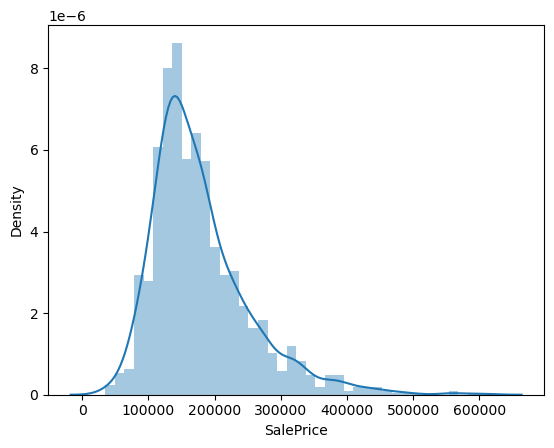

In [48]:
sns.distplot(housing_df['SalePrice'])
plt.show()

#### The target variable looks skewed. Let us verify this by finding the value of skewness and kurtosis.

In [49]:
# Checking the skewness and kurtosis of the target variable
print('Skewness: %.3f' % housing_df['SalePrice'].skew())
print('Kurtosis: %.3f' % housing_df['SalePrice'].kurtosis())

Skewness: 1.494
Kurtosis: 3.454


#### The values of positive skewness and kurtosis indicate that the distribution is moderately skewed to the right and exhibits slightly heavier tails compared to a normal distribution.

A frequently employed method for mitigating skewness in a distribution involves applying a logarithmic transformation to the variable. Utilizing the logarithm is especially beneficial when handling right-skewed data, as it has the effect of compressing larger values and expanding smaller ones.

In [50]:
# Transforming into normal distribution
housing_df['SalePrice'] = np.log(housing_df['SalePrice'])

In [51]:
# Verifying the skewness and kurtosis of the transformed target variable
print('Skewness: %.3f ' % housing_df['SalePrice'].skew())
print('Kurtosis: %.3f' % housing_df['SalePrice'].kurtosis())

Skewness: 0.042 
Kurtosis: 0.662


The `SalePrice` distribution may not be perfect, the skewness and kurtosis values suggest it is close to normal. Small deviations from normality are common in real-world data, and these values indicate only mild departures from a perfectly normal distribution.

In [52]:
housing_df['SalePrice'].describe()

count    1439.000000
mean       12.015413
std         0.392060
min        10.460242
25%        11.771436
50%        11.995352
75%        12.264342
max        13.323927
Name: SalePrice, dtype: float64

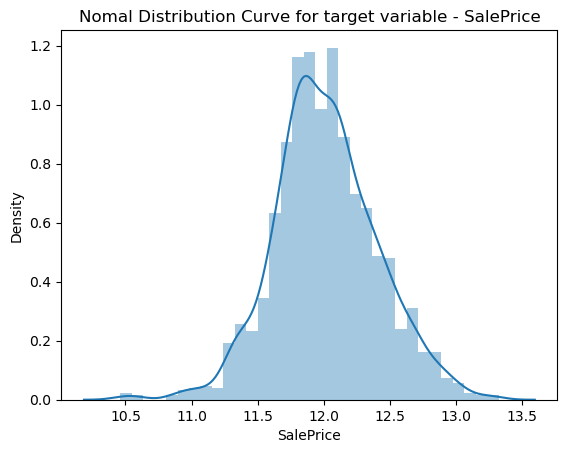

In [53]:
# Analysing it again for normal distribution curve
sns.distplot(housing_df['SalePrice'])
plt.title('Nomal Distribution Curve for target variable - SalePrice')
plt.show()

Now, it looks like a normally distributed curve.

### Bivariate Analysis

We will create visualizations to depict the relationship between the target variable `SalePrice` and both categorical and numerical columns.

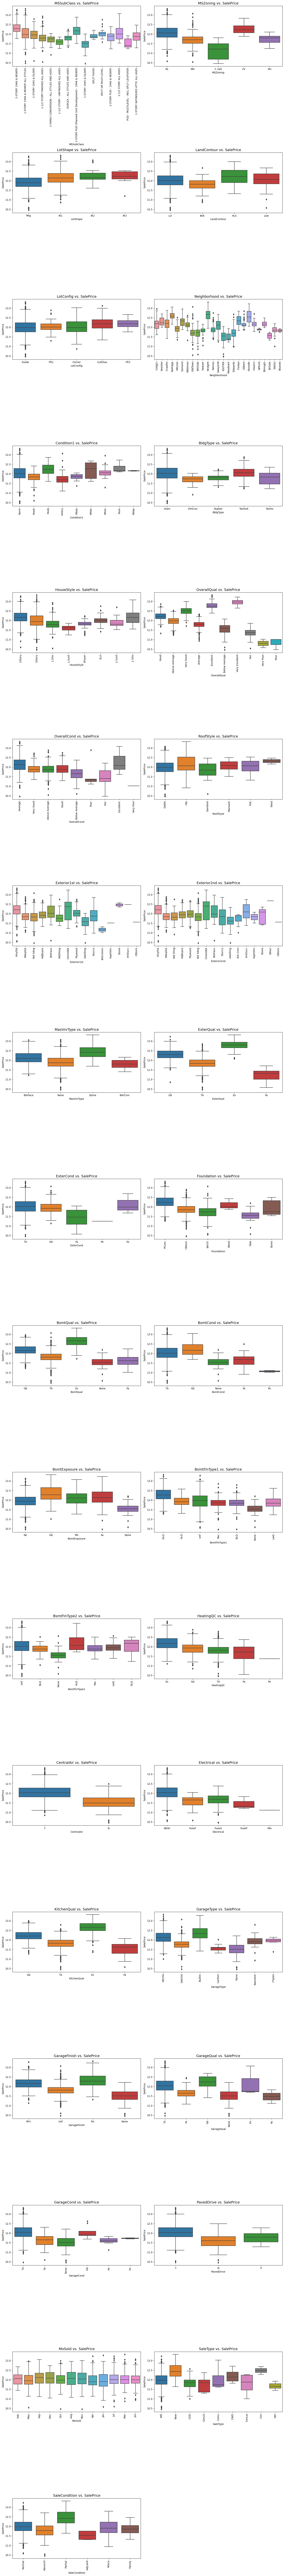

In [54]:
# Bivariate analysis of categorical columns using boxplot
categorical_columns = housing_df.select_dtypes(include = 'object').columns
plot_graph(housing_df, 'bivariate', 'categorical', categorical_columns)

In [55]:
# For numerical columns, we will visualize only values that exhibit a correlation greater than 0.5
# or less than -0.5 with `SalePrice`

# Getting correlations of numerical columns with SalePrice in a dictionary
numerical_corr_dict = housing_df.corr()['SalePrice'].to_dict()

filtered_numerical_cols = [col for col, corr in numerical_corr_dict.items() if abs(corr) > 0.5]

# Filter numerical columns with correlations greater than 0.5 or less than -0.5
filtered_corr_dict = {col: round(corr, 2) for col, corr in numerical_corr_dict.items() if col in filtered_numerical_cols}

# Visualize it in a dataframe
filtered_corr_df = pd.DataFrame(list(filtered_corr_dict.items()), columns = ['Numerical_Column', 'Correlation_with_SalePrice'])

print(filtered_corr_df.sort_values(by = 'Correlation_with_SalePrice', ascending = False))

    Numerical_Column  Correlation_with_SalePrice
6          SalePrice                        1.00
7  Total_Sqr_Footage                        0.73
1          GrLivArea                        0.72
4         GarageCars                        0.68
8    Total_Bathrooms                        0.67
5         GarageArea                        0.66
0        TotalBsmtSF                        0.64
2       TotRmsAbvGrd                        0.54
3        GarageYrBlt                        0.51


<Figure size 1500x1500 with 0 Axes>

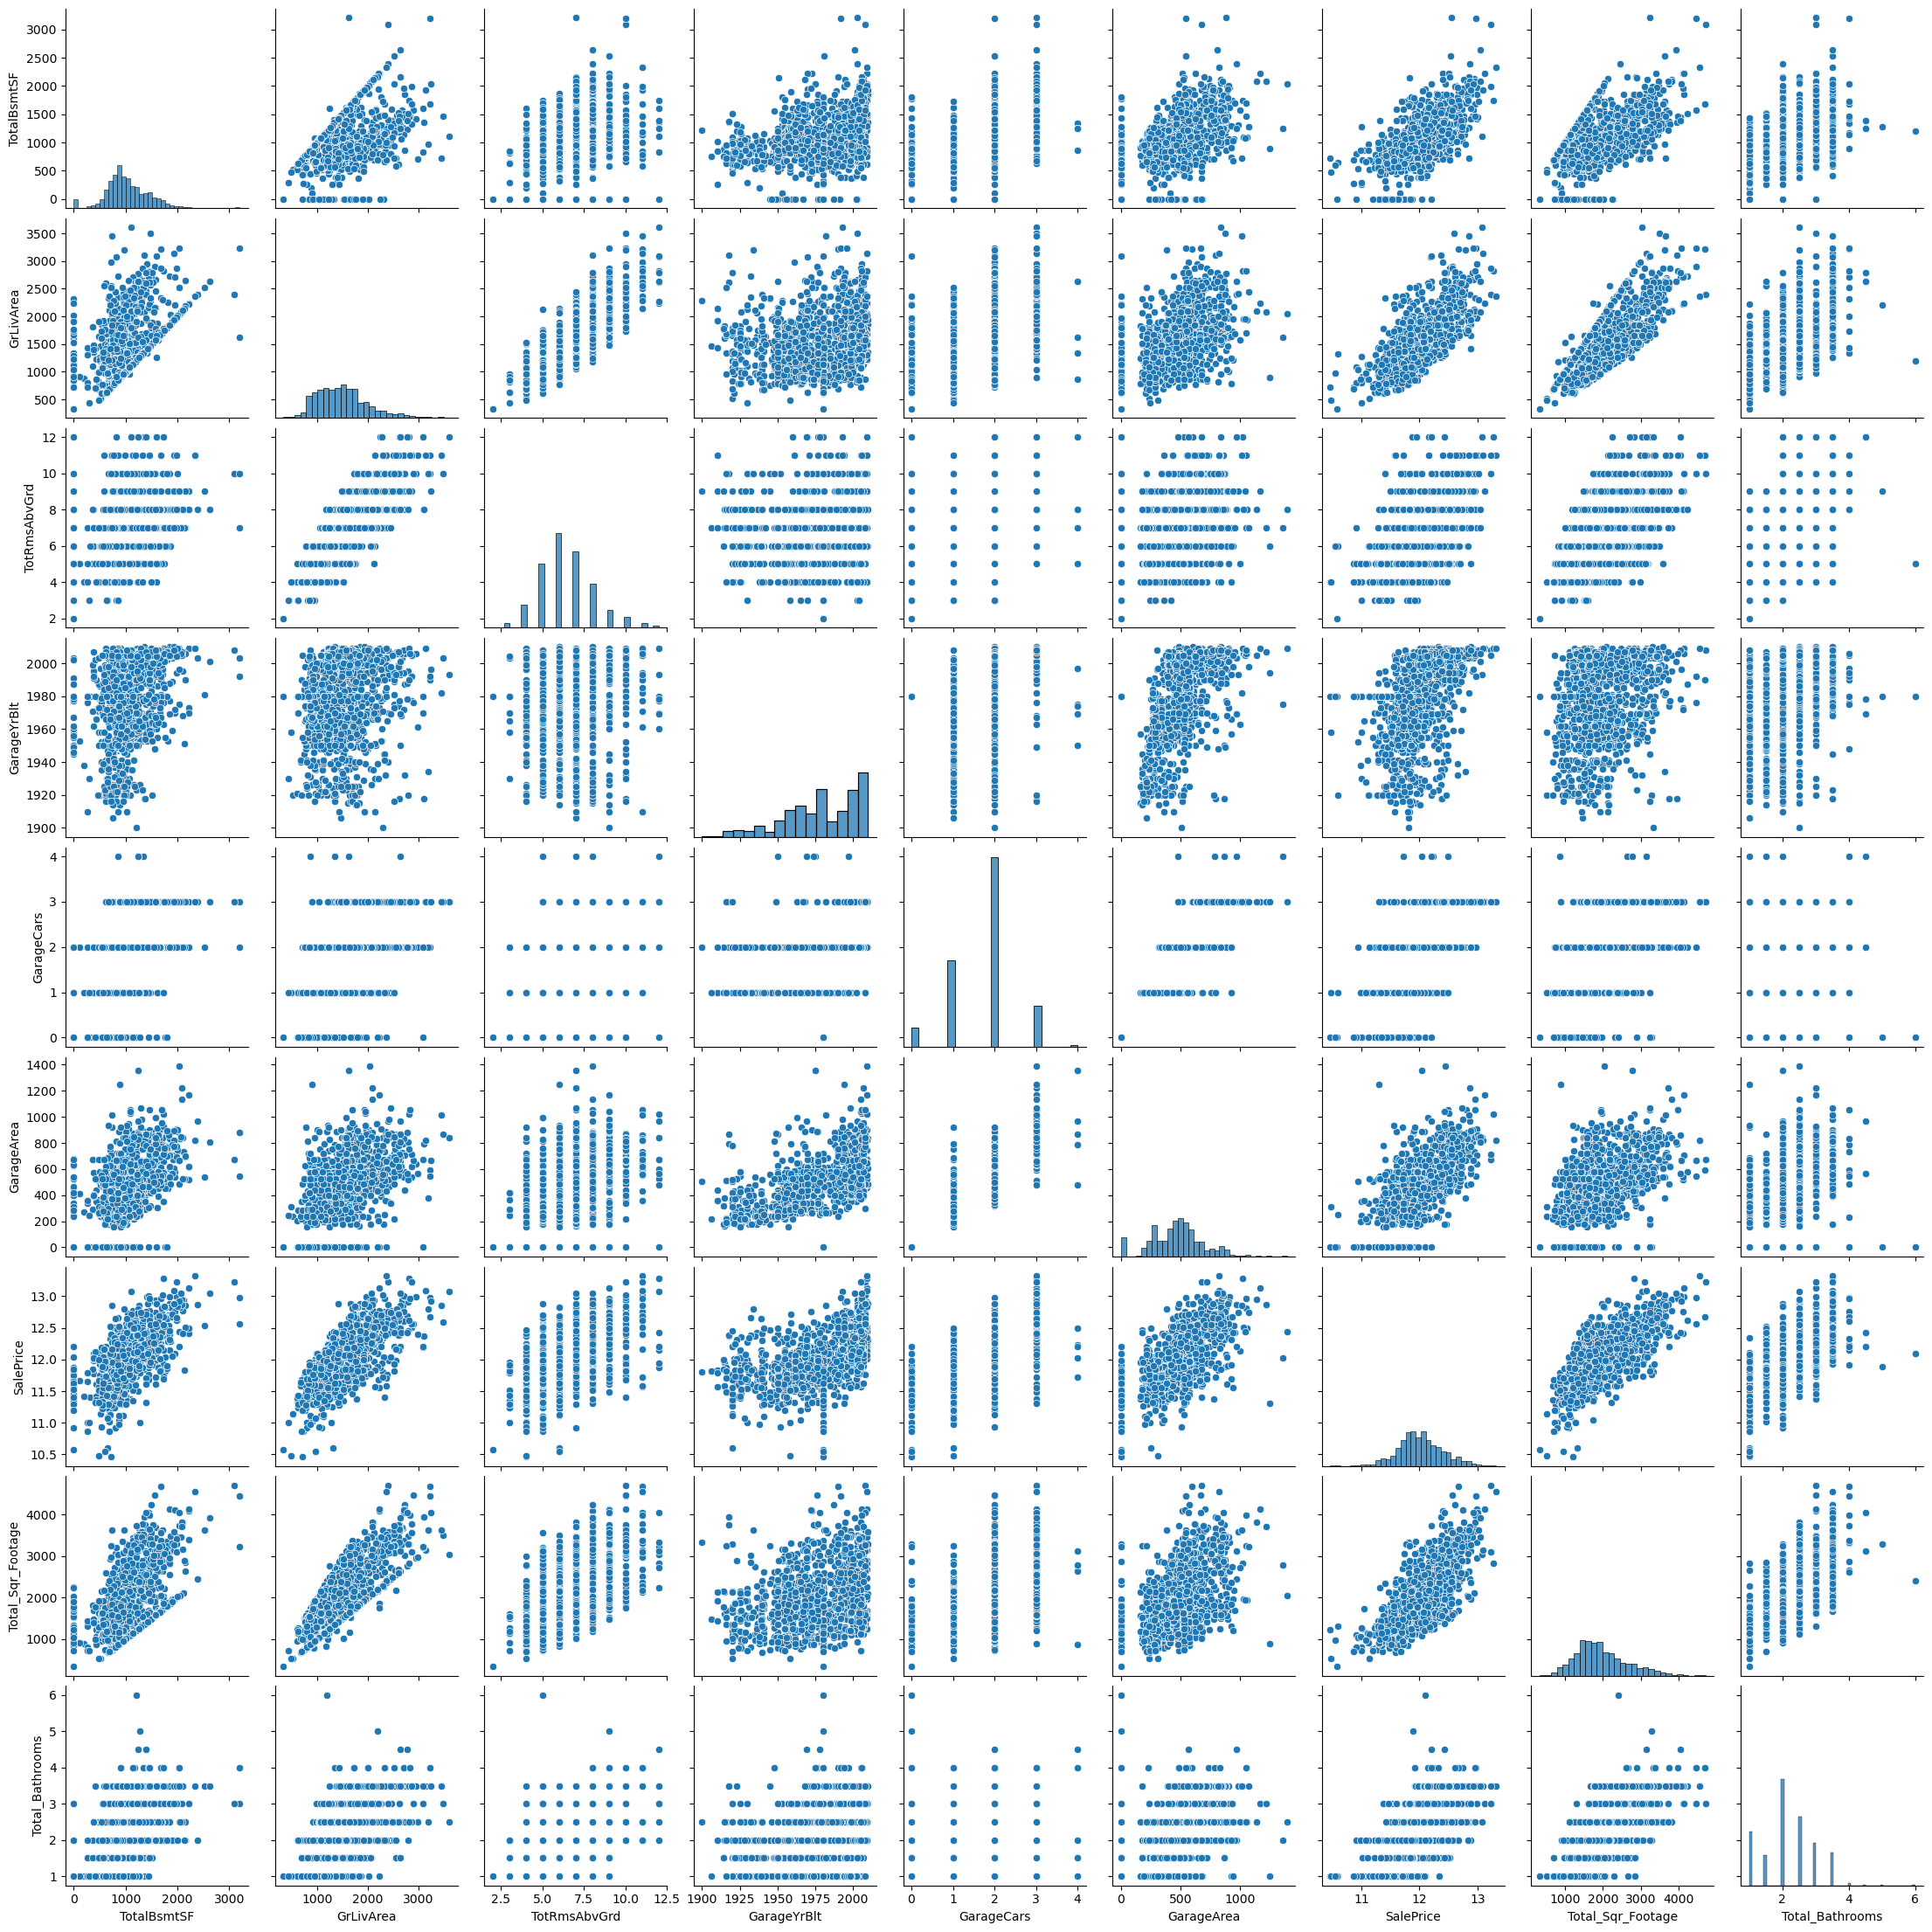

In [56]:
# Visualize filtered numerical cols using pairplot
plt.figure(figsize = (15, 15))
sns.pairplot(housing_df[filtered_numerical_cols])
plt.show()

- `SalePrice` shows an increase with `Total_Sqr_Footage` and `GrLivArea`, indicating a positive correlation.
- `SalePrice` exhibits a positive correlation with `GarageCars` as it increases.
- There is a positive correlation between `SalePrice` and `TotalBsmtSF`.
- There is a positive correlation between `SalePrice` and `GarageArea`.

### Multivariate Analysis

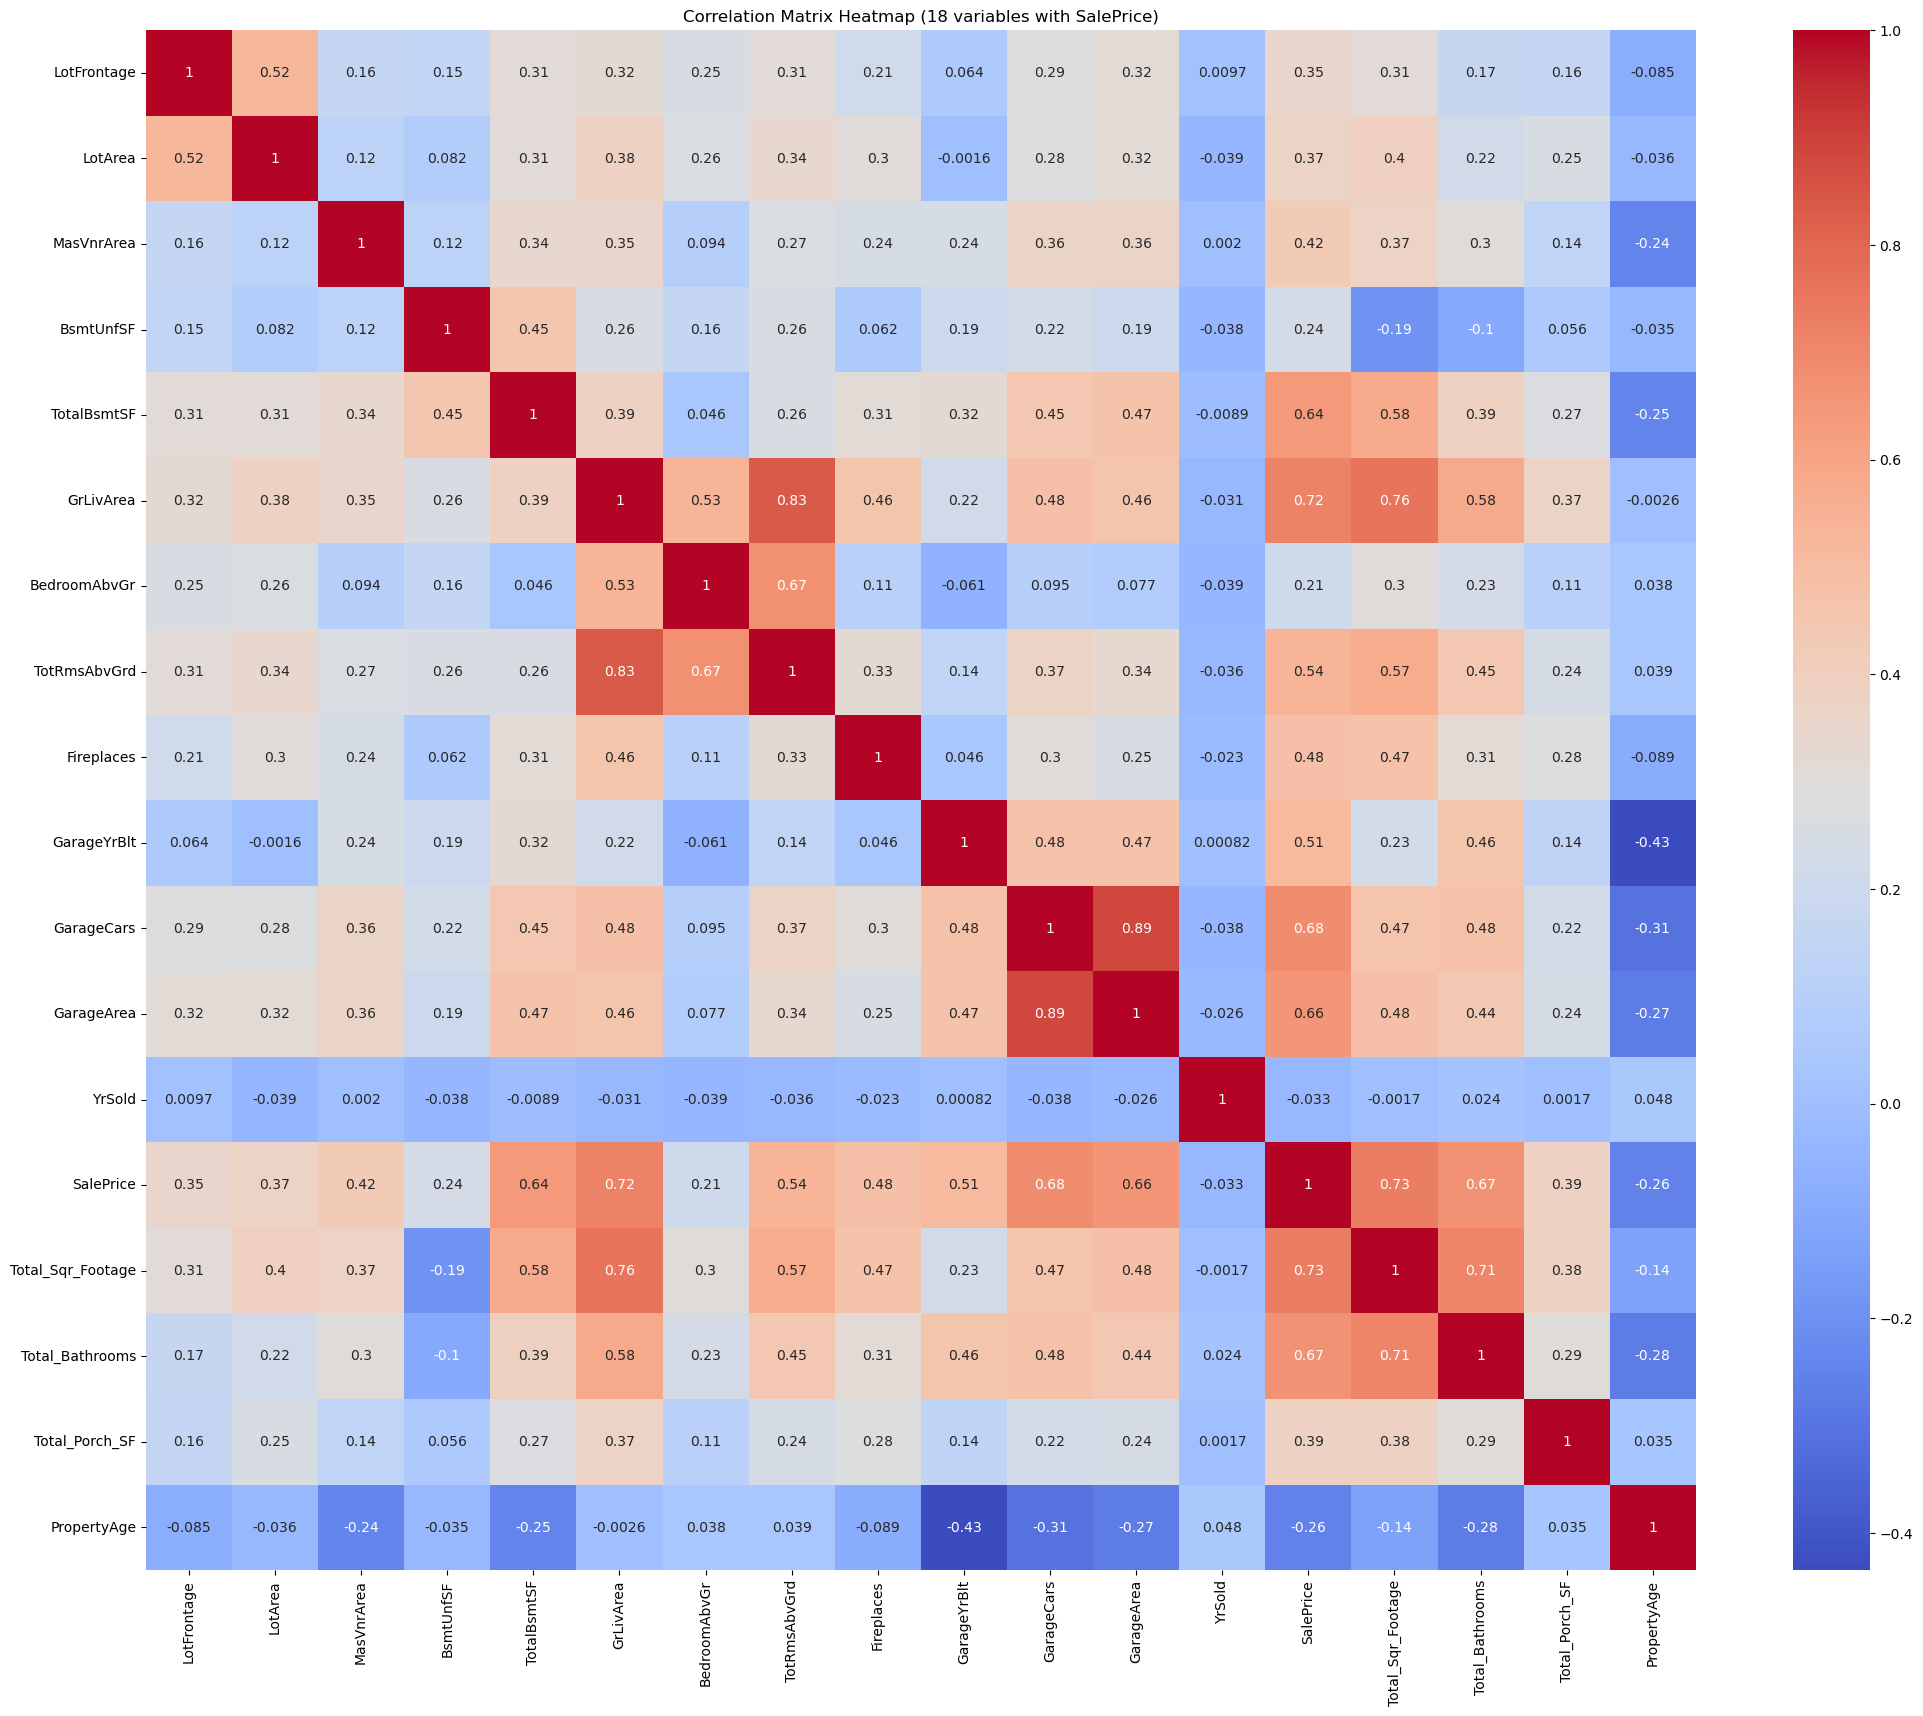

In [57]:
plot_correlation_matrix(housing_df, 'SalePrice')

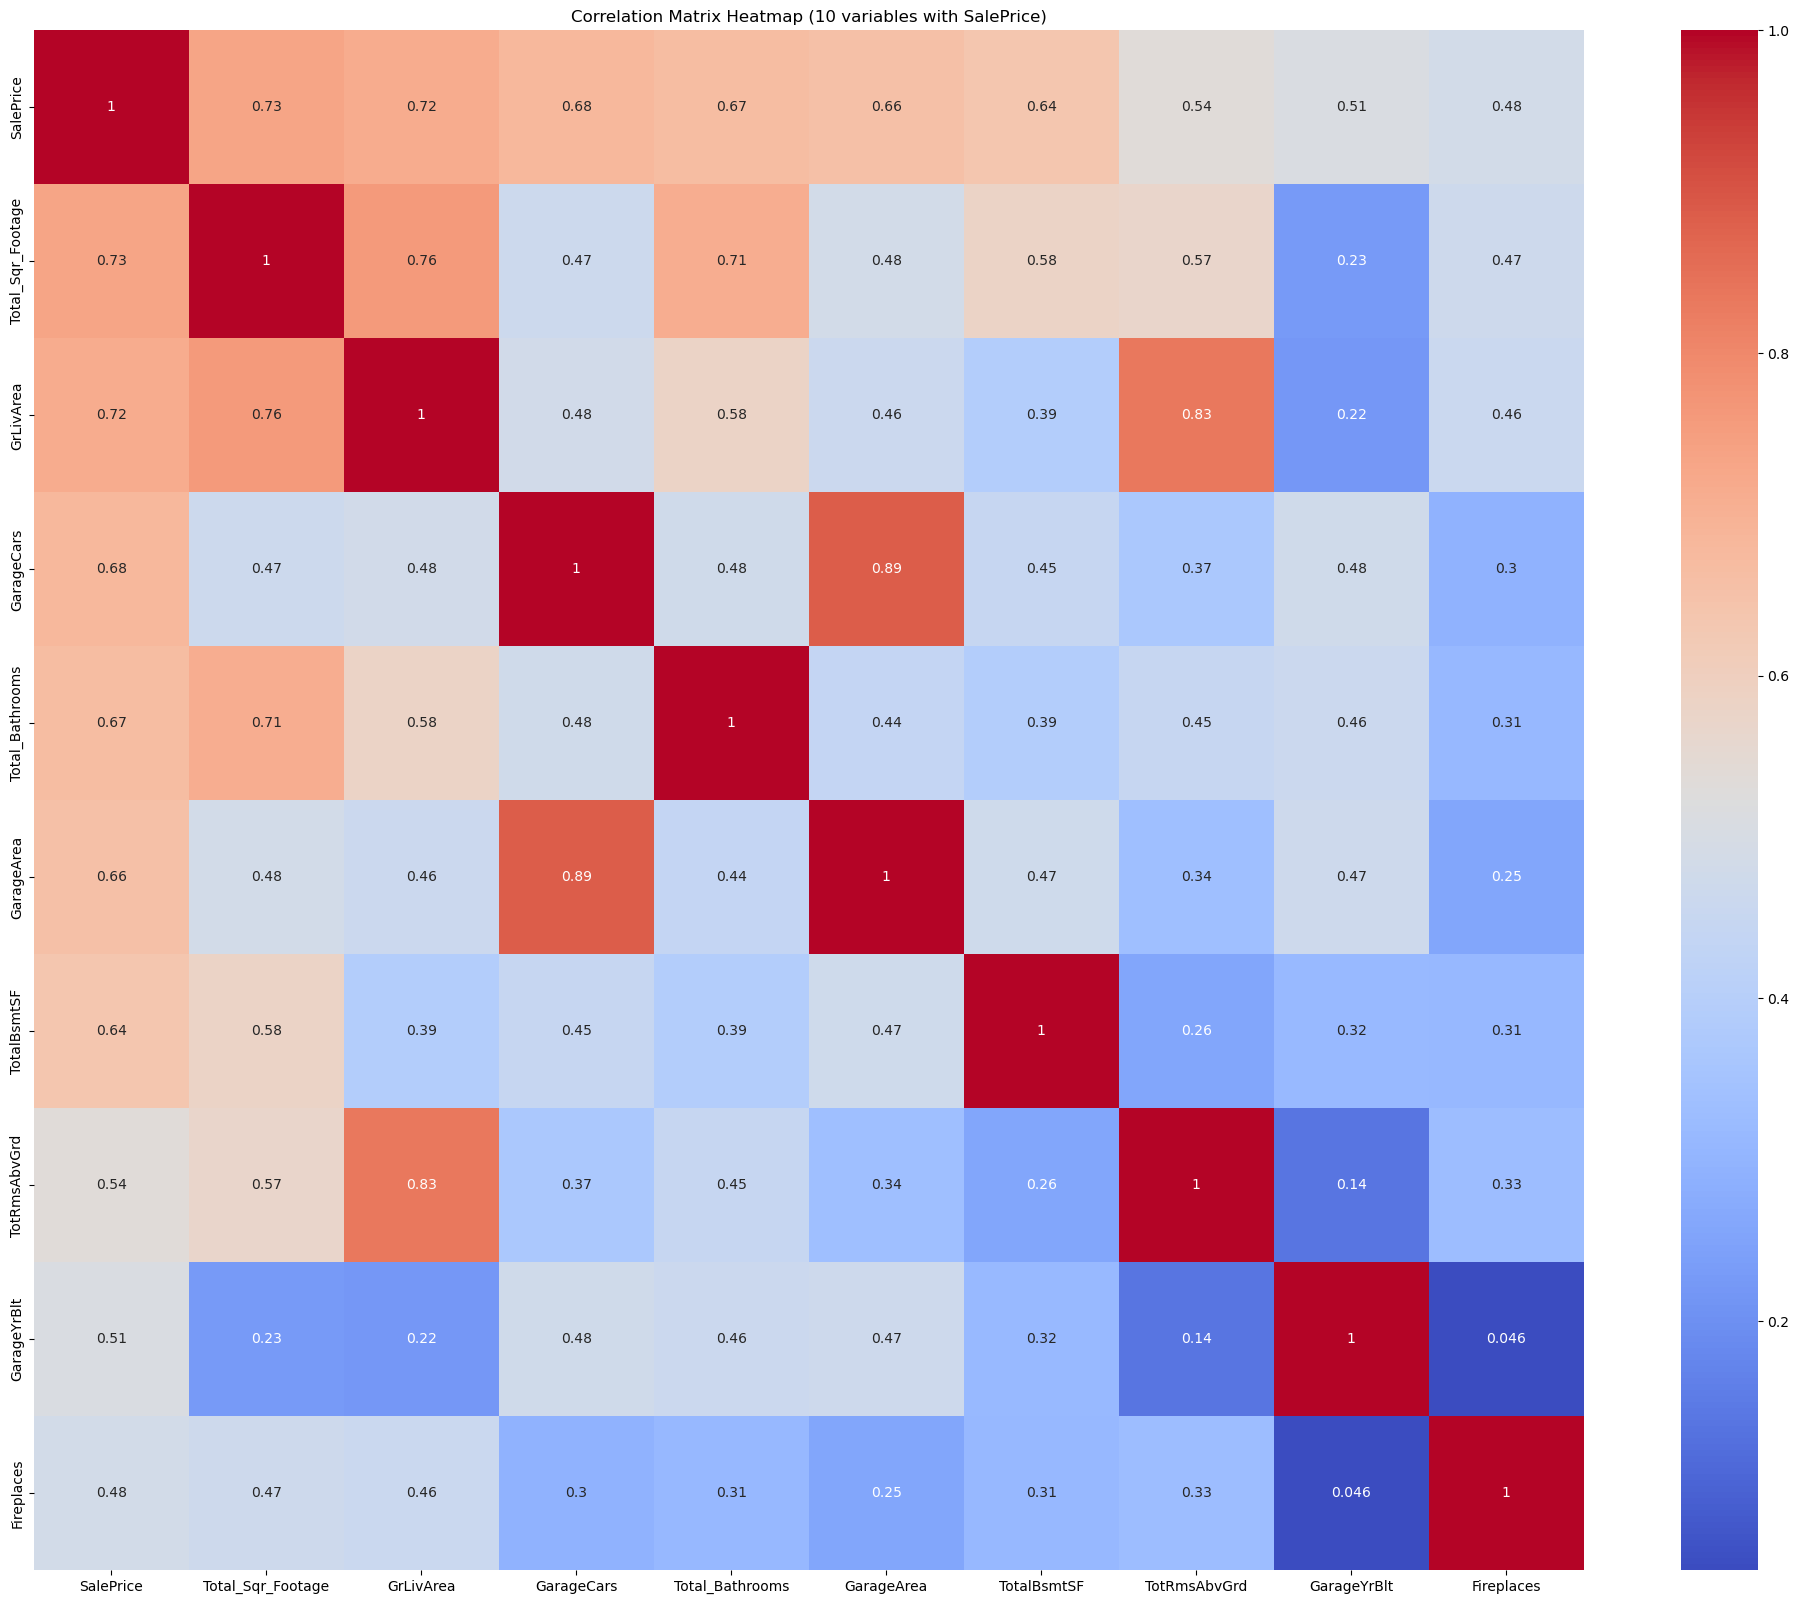

In [58]:
# Visualize the top 10 correlated features with SalePrice in a heatmap
plot_correlation_matrix(housing_df, 'SalePrice', top_n = 10)

#### `Total_Sqr_Footage`, `GrLivArea`, `GarageCars`, `Total_Bathrooms`, `GarageArea`, and `TotalBsmtSF` demonstrate a strong correlation with the variable `SalePrice`.

## 4. Data Preparation

### Creation of Dummy Variables (One Hot Encoding)

In [59]:
# Inspecting the number of unique values in categorical columns
housing_df[categorical_columns].nunique()

MSSubClass       15
MSZoning          5
LotShape          4
LandContour       4
LotConfig         5
Neighborhood     25
Condition1        9
BldgType          5
HouseStyle        8
OverallQual      10
OverallCond       9
RoofStyle         6
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
MoSold           12
SaleType          9
SaleCondition     6
dtype: int64

In [60]:
# Creating dummy variables and saving it in the dataframe
housing_df = pd.get_dummies(data = housing_df, columns = categorical_columns, drop_first = True)

In [61]:
# Inspecting the dataframe shape
housing_df.shape

(1439, 236)

In [62]:
# Checking the column types after dummy variable creation since it creates heterogeneous type numerical variables
housing_df.dtypes.value_counts()

uint8      218
int64       13
float64      5
dtype: int64

In [63]:
housing_df.describe()

LotFrontage       LotArea   MasVnrArea    BsmtUnfSF  TotalBsmtSF  \
count  1439.000000   1439.000000  1439.000000  1439.000000  1439.000000   
mean     69.350938   9734.751911    99.298819   569.029187  1046.191800   
std      19.850270   4150.270952   168.775314   442.816054   410.186703   
min      21.000000   1300.000000     0.000000     0.000000     0.000000   
25%      60.000000   7500.000000     0.000000   224.000000   794.000000   
50%      69.000000   9405.000000     0.000000   481.000000   990.000000   
75%      79.000000  11450.000000   162.000000   808.000000  1276.500000   
max     182.000000  36500.000000  1129.000000  2336.000000  3206.000000   

         GrLivArea  BedroomAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count  1439.000000   1439.000000   1439.000000  1439.000000  1439.000000   
mean   1498.617095      2.859625      6.489924     0.599027  1978.608061   
std     489.426759      0.799706      1.591354     0.633795    24.007025   
min     334.000000      0.000000      2.000000     0.000000  1900.000000   
25%    1126.000000      2.000000      5.000000     0.000000  1962.000000   
50%    1456.000000      3.000000      6.000000     1.000000  1980.000000   
75%    1768.000000      3.000000      7.000000     1.000000  2001.000000   
max    3608.000000      6.000000     12.000000     3.000000  2010.000000   

        GarageCars   GarageArea       YrSold    SalePrice  Total_Sqr_Footage  \
count  1439.000000  1439.000000  1439.000000  1439.000000        1439.000000   
mean      1.760250   470.551077  2007.818624    12.015413        1970.207783   
std       0.746008   211.857252     1.330518     0.392060         693.869232   
min       0.000000     0.000000  2006.000000    10.460242         334.000000   
25%       1.000000   326.000000  2007.000000    11.771436        1486.500000   
50%       2.000000   478.000000  2008.000000    11.995352        1856.000000   
75%       2.000000   576.000000  2009.000000    12.264342        2352.500000   
max       4.000000  1390.000000  2010.000000    13.323927        4708.000000   

       Total_Bathrooms  Total_Porch_SF  PropertyAge  \
count      1439.000000     1439.000000  1439.000000   
mean          2.194927      178.473940    13.511466   
std           0.772247      152.708474    24.412678   
min           1.000000        0.000000     0.000000   
25%           2.000000       45.000000     0.000000   
50%           2.000000      163.000000     0.000000   
75%           2.500000      264.000000    20.000000   
max           6.000000     1027.000000   123.000000   

       MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
count                               1439.000000   
mean                                   0.098680   
std                                    0.298335   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       MSSubClass_1-STORY 1945 & OLDER  \
count                      1439.000000   
mean                          0.047950   
std                           0.213735   
min                           0.000000   
25%                           0.000000   
50%                           0.000000   
75%                           0.000000   
max                           1.000000   

       MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
count                                 1439.000000   
mean                                     0.366921   
std                                      0.482132   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      1.000000   
max                                      1.000000   

       MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
count                                

## 5. Model Building and Evaluation

In [64]:
# Getting the feature variables in X and dependent variable `SalePrice` in y
X = housing_df.drop('SalePrice', axis = 1)
y = housing_df['SalePrice']

#### Splitting the dataset into training and test set

In [65]:
# Splitting the data into a 70% training set and a 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [66]:
# Checking shape and size for train and test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1007, 235)
(1007,)
(432, 235)
(432,)


In [67]:
X_train.head()

LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  \
427          77.0     8593         0.0        619          907        907   
1446         69.0    26142       189.0        595         1188       1188   
391          71.0    12209         0.0        114          804       1961   
873          60.0    12144         0.0        457          832       1268   
993          68.0     8846         0.0        750          750       1500   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
427              3             5           0       1964.0           1   
1446             3             6           0       1962.0           1   
391              3             7           1       2001.0           2   
873              3             6           1       1949.0           1   
993              3             6           0       2005.0           2   

      GarageArea  YrSold  Total_Sqr_Footage  Total_Bathrooms  Total_Porch_SF  \
427          352    2008               1195              1.0               0   
1446         312    2010               1781              1.0             300   
391          560    2009               2651              3.5             317   
873          288    2009               1411              1.0              28   
993          564    2006               1500              2.5              35   

      PropertyAge  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
427             0                                         0   
1446            0                                         0   
391             1                                         0   
873             1                                         0   
993             1                                         0   

      MSSubClass_1-STORY 1945 & OLDER  \
427                                 0   
1446                                0   
391                                 0   
873                                 0   
993                                 0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
427                                            1   
1446                                           1   
391                                            0   
873                                            0   
993                                            0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
427                                                                  0   
1446                                                                 0   
391                                                                  0   
873                                                                  0   
993                                                                  0   

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
427                                              0   
1446                                             0   
391                                              0   
873                                              1   
993                                              0   

      MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
427                                                      0   
1446                                                     0   
391                                                      0   
873                                                      0   
993                                                      0   

      MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
427                                 0                                0   
1446                                0                                0   
391                                 0                                0   
873                                 0                                0   
993                                 0                                0   

      MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
427             

### Feature Scaling using MinMaxScaler

`MinMaxScaler` is a feature scaling technique used in machine learning to scale numerical features to a specific range, usually between 0 and 1. It works by transforming each feature individually, scaling it to a specified range (by default, between 0 and 1). The formula for scaling is given by:

$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$

where X is the original feature, X$_{min}$ is the minimum value of the feature, and X$_{max}$ is the maximum value of the feature.

In [68]:
# Use MinMaxScaler to scale values
scaler = MinMaxScaler()

In [69]:
numerical_columns = X_train.select_dtypes(include = ['int64', 'float64', 'uint8']).columns

In [70]:
numerical_columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=235)

In [71]:
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [72]:
# Inspect the training set after scaling
X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  \
427      0.366013  0.215559    0.000000   0.287506     0.282907   0.175015   
1446     0.313725  0.734254    0.180516   0.276359     0.370555   0.260843   
391      0.326797  0.322437    0.000000   0.052949     0.250780   0.496946   
873      0.254902  0.320515    0.000000   0.212262     0.259513   0.285278   
993      0.307190  0.223037    0.000000   0.348351     0.233936   0.356139   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
427            0.5           0.3    0.000000         0.54        0.25   
1446           0.5           0.4    0.000000         0.52        0.25   
391            0.5           0.5    0.333333         0.91        0.50   
873            0.5           0.4    0.333333         0.39        0.25   
993            0.5           0.4    0.000000         0.95        0.50   

      GarageArea  YrSold  Total_Sqr_Footage  Total_Bathrooms  Total_Porch_SF  \
427     0.259587    0.50           0.196845            0.000        0.000000   
1446    0.230088    1.00           0.330818            0.000        0.292113   
391     0.412979    0.75           0.529721            0.625        0.308666   
873     0.212389    0.75           0.246228            0.000        0.027264   
993     0.415929    0.00           0.266575            0.375        0.034080   

      PropertyAge  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
427      0.000000                                       0.0   
1446     0.000000                                       0.0   
391      0.008197                                       0.0   
873      0.008197                                       0.0   
993      0.008197                                       0.0   

      MSSubClass_1-STORY 1945 & OLDER  \
427                               0.0   
1446                              0.0   
391                               0.0   
873                               0.0   
993                               0.0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
427                                          1.0   
1446                                         1.0   
391                                          0.0   
873                                          0.0   
993                                          0.0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
427                                                                0.0   
1446                                                               0.0   
391                                                                0.0   
873                                                                0.0   
993                                                                0.0   

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
427                                            0.0   
1446                                           0.0   
391                                            0.0   
873                                            1.0   
993                                            0.0   

      MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
427                                                    0.0   
1446                                                   0.0   
391                                                    0.0   
873                                                    0.0   
993                                                    0.0   

      MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
427                               0.0                              0.0   
1446                              0.0                              0.0   
391                               0.0                              0.0   
873                               0.0                              0.0   
993                               0.0                              0.0   

      MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
427       

In [73]:
X_train.shape

(1007, 235)

### Selecting Features using Recursive Feature Elimination (RFE) approach

RFE, or Recursive Feature Elimination, is a feature selection technique in machine learning. It works by recursively removing the least important features based on model performance, helping to identify the most relevant features for optimal model accuracy and efficiency.

In [74]:
# Create and train the model with RFE
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 100)

rfe = rfe.fit(X_train, y_train)

In [75]:
# List of feature variables and their respective selection status and ranks
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 10),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 84),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', False, 125),
 ('GrLivArea', False, 120),
 ('BedroomAbvGr', False, 63),
 ('TotRmsAbvGrd', False, 134),
 ('Fireplaces', False, 36),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('YrSold', False, 112),
 ('Total_Sqr_Footage', True, 1),
 ('Total_Bathrooms', True, 1),
 ('Total_Porch_SF', True, 1),
 ('PropertyAge', False, 41),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', True, 1),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 100),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', True, 1),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  False,
  17),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', False, 18),
 ('MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES', False, 26),
 ('MSSubClass_2-1/2 STORY ALL AGES', True, 1),
 ('MSSubClass_2-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_2-STORY 1946 & NEWER', True, 1)

In [76]:
# Get the columns which are selected using RFE approach
selected_features = X_train.columns[rfe.support_]

In [77]:
# Verifying column names which are selected
selected_features

Index(['LotArea', 'BsmtUnfSF', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'Total_Sqr_Footage', 'Total_Bathrooms', 'Total_Porch_SF',
       'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_2-1/2 STORY ALL AGES', 'MSSubClass_2-STORY 1945 & OLDER',
       'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_StoneBr', 'BldgType_Duplex', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'OverallQual_Below Average', 'OverallQual_Excellent',
       'OverallQual_Fair', 'OverallQual_Good', 'OverallQual_Poor',
       'OverallQual_Very Excellent', 'OverallQual_Very Good',
       'OverallQual_Very Poor', 'OverallCond_Average',
       

In [78]:
# Get the columns which are rejected using RFE approach
rejected_features = X_train.columns[~rfe.support_]

In [79]:
# Verifying column names which are rejected
rejected_features

Index(['LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'YrSold', 'PropertyAge',
       'MSSubClass_1-STORY 1945 & OLDER',
       ...
       'MoSold_Nov', 'MoSold_Oct', 'MoSold_Sep', 'SaleType_CWD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=135)

In [80]:
# Check the shape of train and test
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(1007, 100)
(432, 100)
(1007,)
(432,)


In [81]:
lm1 = lm.fit(X_train, y_train)

In [82]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

10.60249975857065
[ 5.35260345e-02  2.15001522e-01  1.04474661e-02  3.10359919e-01
 -2.48667522e-02 -1.17622748e-02  3.43511732e-02 -1.59880389e-03
  5.28372741e-02  5.06279815e-02  7.78379855e-02  1.22099905e-01
 -7.38045962e-03  8.26610043e-01  1.33028258e-01  1.03231530e-01
 -2.49449154e-02  1.25200870e-01  2.64388195e-02  1.33007465e-01
  1.33877881e-01  8.85740418e-02  6.18115152e-02  1.53672393e-01
  1.61550045e-01  1.58950155e-01  9.25491175e-02  8.12226843e+09
  3.95407921e-02  5.20799987e-02  1.81627860e-02  4.83036953e-01
  4.02472614e-01  4.05432999e-01  3.69248748e-01  1.10677779e-02
 -3.80513668e-02  1.37159824e-02  2.20371485e-02 -1.04020238e-02
  6.42541051e-03  4.32097316e-02 -2.05795765e-02  9.89487767e-03
 -1.05524063e-03  2.70614028e-02 -7.58111477e-04  8.60005617e-03
 -3.71874380e-03  1.46141052e-02  1.30478859e-01 -7.11233616e-02
  7.47686625e-03 -9.41744447e-03 -1.37836337e-01 -4.07700390e-02
 -4.39709574e-02 -2.90583968e-02 -1.82116032e-02  4.44117934e-02
  7.309

In [83]:
# Calculate R2 Score, RSS and RMSE for the training and test set
metric = calculate_metrics(rfe, X_train, y_train, X_test, y_test)

R2 Score (Train): 0.938
R2 Score (Test): -3873175761347225088.000
RSS (Train): 9.510
RSS (Test): 264595904012509609984.000
RMSE (Train): 0.097
RMSE (Test): 782617734.624


#### An R2 score of -3.873e+18 suggests that the linear regression model is performing very poorly on the test set, likely due to overfitting. Overfitting occurs when a model learns the training data too well, capturing noise and patterns that don't generalize to new, unseen data.

### Regularization using Ridge and Lasso

Regularization is a technique used in machine learning to prevent overfitting and improve the generalization performance of a model. Overfitting occurs when a model learns the training data too well, including the noise or random fluctuations in the data, and performs poorly on new, unseen data. Regularization introduces a penalty term to the model's objective function, discouraging overly complex models that may fit the training data too closely.

#### Types of Regularization Techniques:

1. **L1 Regularization (Lasso):**
   - In L1 regularization, a penalty term is added to the objective function, proportional to the absolute values of the model's coefficients.
   - The regularization term is represented by the sum of the absolute values of the coefficients, multiplied by a regularization parameter (\(\lambda\) or alpha).
   - L1 regularization tends to produce sparse models, meaning it encourages some coefficients to be exactly zero, effectively performing feature selection.
   
   The L1 regularization term is given by: $ \lambda \sum_{i=1}^{n} |w_i| $

2. **L2 Regularization (Ridge):**
   - In L2 regularization, a penalty term is added to the objective function, proportional to the square of the model's coefficients.
   - The regularization term is represented by the sum of the squared values of the coefficients, multiplied by a regularization parameter ($\lambda$ or \$\alpha$).
   - L2 regularization tends to shrink the coefficients towards zero, but it rarely results in exactly zero coefficients.

   The L2 regularization term is given by: $ \lambda \sum_{i=1}^{n} w_i^2 $

The regularization parameter $\lambda$ or \$\alpha$  controls the strength of the regularization. A higher value of the regularization parameter results in stronger regularization and a simpler model.

Let's now try predicting `SalePrice` using Ridge and Lasso Regression.

### Ridge Regression

In [84]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score = True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [86]:
alpha = model_cv.best_params_['alpha']

In [87]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.71806282e-02  1.31687912e-01  3.64146377e-02  8.23754897e-02
  1.79431996e-01  2.40688477e-01  3.11503040e-02  9.99608713e-02
  7.94237619e-02  3.24049248e-02  8.50161824e-02  1.02828766e-01
 -1.18125023e-02  2.73112015e-01  1.54580133e-01  9.91312467e-02
  7.28748240e-03  2.24689312e-02 -7.88718816e-02  3.13127595e-02
  1.17879269e-02  1.62603023e-02 -1.08647614e-02  4.04950203e-02
  4.22421639e-02  3.42353585e-02 -3.32002787e-02 -1.30075669e-03
 -3.05313161e-02 -6.47487378e-03 -8.39426313e-03  9.74649306e-02
  4.79194817e-02  5.58078071e-02  1.91816434e-02  3.76066286e-02
  1.49926954e-03  5.72027168e-03  1.99255325e-02 -4.56568433e-02
  2.69920895e-03  4.26454195e-02 -2.97472803e-02  1.32890618e-03
 -4.73478010e-03  2.91723222e-03 -1.19048105e-02  1.12250798e-03
  7.57196247e-03  6.42572172e-03  1.08357187e-01 -5.73785479e-02
 -1.25317311e-02 -6.14506715e-02 -1.01258633e-01 -2.71468671e-02
 -3.20792341e-02  2.38820982e-02 -2.83417528e-03  5.19070443e-02
  7.43447530e-02 -7.03265

In [88]:
# Calculate R2 Score, RSS and RMSE for the training and test set
metric2 = calculate_metrics(ridge, X_train, y_train, X_test, y_test)

R2 Score (Train): 0.938
R2 Score (Test): 0.900
RSS (Train): 9.420
RSS (Test): 6.833
RMSE (Train): 0.097
RMSE (Test): 0.126


In [89]:
# Create a dataframe of ridge cross validation results
ridgeCV_results = pd.DataFrame(model_cv.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.012005      0.009131         0.001950        0.001414      0.0001   
1        0.006251      0.007060         0.001639        0.001048       0.001   
2        0.003471      0.001056         0.001143        0.000677        0.01   
3        0.002658      0.000453         0.000776        0.000007        0.05   
4        0.003179      0.001271         0.001141        0.000613         0.1   
5        0.004159      0.001806         0.000803        0.000033         0.2   
6        0.003667      0.001990         0.001511        0.000912         0.3   
7        0.004929      0.002764         0.001266        0.000605         0.4   
8        0.003725      0.000606         0.001659        0.000733         0.5   
9        0.003624      0.001021         0.001404        0.001253         0.6   
10       0.004690      0.001389         0.002194        0.001292         0.7   
11       0.004126      0.001571         0.001116        0.000677         0.8   
12       0.005148      0.003554         0.001078        0.000591         0.9   
13       0.003745      0.001282         0.001119        0.000678         1.0   
14       0.003306      0.001753         0.001501        0.000718         2.0   
15       0.003937      0.001744         0.001124        0.000682         3.0   
16       0.003160      0.000939         0.001462        0.000859         4.0   
17       0.003672      0.001362         0.001003        0.000358         5.0   
18       0.003201      0.001410         0.001467        0.000866         6.0   
19       0.003684      0.001458         0.000986        0.000263         7.0   
20       0.003048      0.001028         0.001155        0.000774         8.0   
21       0.003415      0.001758         0.000851        0.000159         9.0   
22       0.003712      0.001244         0.001413        0.000789        10.0   
23       0.003222      0.001475         0.001065        0.000599          20   
24       0.003792      0.001538         0.001131        0.000645          50   
25       0.003868      0.001545         0.001347        0.000704         100   
26       0.002971      0.000910         0.001101        0.000658         500   
27       0.003369      0.000810         0.001677        0.001167        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.093319          -0.093008   
1    {'alpha': 0.001}          -0.093194          -0.092845   
2     {'alpha': 0.01}          -0.092168          -0.091750   
3     {'alpha': 0.05}          -0.089088          -0.089909   
4      {'alpha': 0.1}          -0.086665          -0.089163   
5      {'alpha': 0.2}          -0.084048          -0.088534   
6      {'alpha': 0.3}          -0.082891          -0.088144   
7      {'alpha': 0.4}          -0.082270          -0.087860   
8      {'alpha': 0.5}          -0.081757          -0.087621   
9      {'alpha': 0.6}          -0.081321          -0.087417   
10     {'alpha': 0.7}          -0.080935          -0.087242   
11     {'alpha': 0.8}          -0.080583          -0.087096   
12     {'alpha': 0.9}          -0.080261          -0.087001   
13     {'alpha': 1.0}          -0.079971          -0.086949   
14     {'alpha': 2.0}          -0.078202          -0.086695   
15     {'alpha': 3.0}          -0.077321          -0.086665   
16     {'alpha': 4.0}          -0.076965          -0.086713   
17     {'alpha': 5.0}          -0.076791          -0.086886   
18     {'alpha': 6.0}          -0.076767          -0.087131   
19     {'alpha': 7.0}          -0.076954          -0.087391   
20     {'alpha': 8.0}          -0.077277          -0.087633   
21     {'alpha': 9.0}          -0.077670          -0.087895   
22    {'alpha': 10.0}          -0.078128          -0.088155   
23      {'alpha': 20}          -0.083888          -0.092607   
24      {'alpha': 50}          -0.096860          -0.102834   
25     {'alpha': 100}          -0.111615     

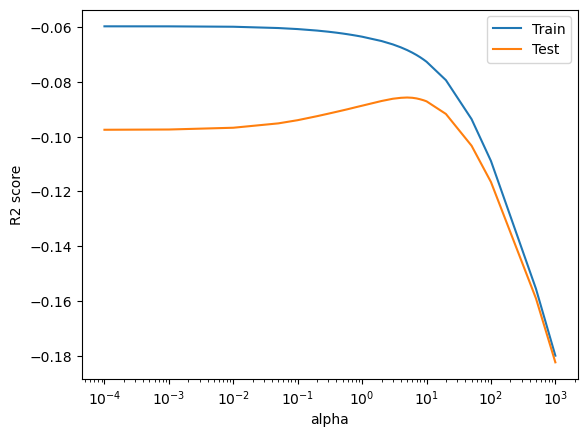

In [90]:
## Plotting R2 score vs alpha values
plot_r2_vs_alpha(ridgeCV_results)

#### As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.

### Lasso Regression

In [91]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score = True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [93]:
alpha = model_cv.best_params_['alpha']

In [94]:
# Fitting Ridge model for alpha and printing coefficients which have been penalised

lasso = Lasso(alpha = alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [95]:
lasso.coef_

array([ 6.03539535e-03,  1.13848746e-01,  0.00000000e+00,  1.94807695e-01,
        0.00000000e+00,  2.80553792e-01,  0.00000000e+00,  0.00000000e+00,
        7.31679300e-02,  7.45865901e-03,  1.19498357e-01,  8.24085280e-02,
       -0.00000000e+00,  6.39894577e-01,  1.17118564e-01,  5.95131695e-02,
       -0.00000000e+00,  0.00000000e+00, -9.32570828e-02,  1.46140250e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.94987047e-02, -4.34545880e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  5.27979938e-02,
        0.00000000e+00,  3.02481018e-02, -1.63136646e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -5.43720057e-03,
        0.00000000e+00,  2.51026283e-02, -0.00000000e+00,  0.00000000e+00,
       -3.81943118e-03,  0.00000000e+00, -0.00000000e+00,  1.87244790e-03,
        0.00000000e+00,  0.00000000e+00,  1.11129316e-01, -2.73673558e-02,
        0.00000000e+00, -

In [96]:
# Calculate R2 Score, RSS and RMSE for the training and test set
metric3 = calculate_metrics(lasso, X_train, y_train, X_test, y_test)

R2 Score (Train): 0.926
R2 Score (Test): 0.900
RSS (Train): 11.341
RSS (Test): 6.808
RMSE (Train): 0.106
RMSE (Test): 0.126


In [97]:
## Create a dataframe of lasso cross validation results
lassoCV_results = pd.DataFrame(model_cv.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.151422      0.053098         0.001292        0.000676      0.0001   
1        0.100899      0.061277         0.001421        0.000702       0.001   
2        0.006125      0.001766         0.002023        0.000955        0.01   
3        0.004292      0.001595         0.000879        0.000159        0.05   
4        0.002601      0.001664         0.001246        0.000737         0.1   
5        0.002569      0.001539         0.001067        0.000513         0.2   
6        0.002346      0.001301         0.001102        0.000579         0.3   
7        0.002596      0.001861         0.001089        0.000643         0.4   
8        0.002686      0.000921         0.001421        0.000805         0.5   
9        0.002541      0.000767         0.001151        0.000774         0.6   
10       0.002408      0.000795         0.001083        0.000633         0.7   
11       0.002416      0.001502         0.001096        0.000645         0.8   
12       0.003007      0.001485         0.001456        0.000843         0.9   
13       0.002201      0.001145         0.001102        0.000708         1.0   
14       0.002060      0.000855         0.001218        0.000913         2.0   
15       0.002220      0.001160         0.001082        0.000605         3.0   
16       0.002314      0.001333         0.001224        0.000946         4.0   
17       0.002312      0.001320         0.001085        0.000624         5.0   
18       0.002275      0.001159         0.001130        0.000727         6.0   
19       0.002905      0.001521         0.001455        0.000869         7.0   
20       0.001621      0.000028         0.000771        0.000004         8.0   
21       0.002767      0.002310         0.001198        0.000868         9.0   
22       0.003394      0.002141         0.001307        0.000642        10.0   
23       0.002609      0.001504         0.001089        0.000651          20   
24       0.002357      0.001439         0.001225        0.000666          50   
25       0.002373      0.001158         0.001409        0.000553         100   
26       0.002616      0.001284         0.001190        0.000622         500   
27       0.002399      0.000690         0.001392        0.001227        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.081266          -0.083686   
1    {'alpha': 0.001}          -0.073070          -0.082950   
2     {'alpha': 0.01}          -0.118870          -0.119662   
3     {'alpha': 0.05}          -0.220528          -0.218571   
4      {'alpha': 0.1}          -0.283038          -0.279141   
5      {'alpha': 0.2}          -0.299685          -0.295202   
6      {'alpha': 0.3}          -0.299685          -0.295202   
7      {'alpha': 0.4}          -0.299685          -0.295202   
8      {'alpha': 0.5}          -0.299685          -0.295202   
9      {'alpha': 0.6}          -0.299685          -0.295202   
10     {'alpha': 0.7}          -0.299685          -0.295202   
11     {'alpha': 0.8}          -0.299685          -0.295202   
12     {'alpha': 0.9}          -0.299685          -0.295202   
13     {'alpha': 1.0}          -0.299685          -0.295202   
14     {'alpha': 2.0}          -0.299685          -0.295202   
15     {'alpha': 3.0}          -0.299685          -0.295202   
16     {'alpha': 4.0}          -0.299685          -0.295202   
17     {'alpha': 5.0}          -0.299685          -0.295202   
18     {'alpha': 6.0}          -0.299685          -0.295202   
19     {'alpha': 7.0}          -0.299685          -0.295202   
20     {'alpha': 8.0}          -0.299685          -0.295202   
21     {'alpha': 9.0}          -0.299685          -0.295202   
22    {'alpha': 10.0}          -0.299685          -0.295202   
23      {'alpha': 20}          -0.299685          -0.295202   
24      {'alpha': 50}          -0.299685          -0.295202   
25     {'alpha': 100}          -0.299685     

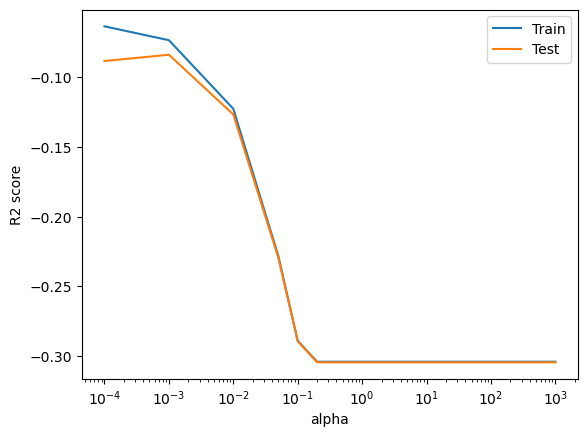

In [98]:
## Plotting R2 score vs alpha values
plot_r2_vs_alpha(lassoCV_results)

#### As the value of alpha increases, we see a decrease in both train and test error.

### Comparing the models

In [99]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)',
                       'MSE (Train)', 'MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.380000e-01             0.938             0.926
1   R2 Score (Test)      -3.873176e+18             0.900             0.900
2       RSS (Train)       9.510000e+00             9.420            11.341
3        RSS (Test)       2.645959e+20             6.833             6.808
4       MSE (Train)       9.700000e-02             0.097             0.106
5        MSE (Test)       7.826177e+08             0.126             0.126

#### Both Ridge and Lasso models seem to be performing reasonably well on the test set with R2 score of 0.90, and we may choose between them based on considerations such as interpretability, the desire for feature selection, or other task-specific requirements.

### Lets observe the changes in the coefficients after regularization

In [100]:
betas = pd.DataFrame(index = X.columns)

In [101]:
betas.rows = X.columns

In [102]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [106]:
betas

Linear  \
LotFrontage                                                       5.352603e-02   
LotArea                                                           2.150015e-01   
MasVnrArea                                                        1.044747e-02   
BsmtUnfSF                                                         3.103599e-01   
TotalBsmtSF                                                      -2.486675e-02   
GrLivArea                                                        -1.176227e-02   
BedroomAbvGr                                                      3.435117e-02   
TotRmsAbvGrd                                                     -1.598804e-03   
Fireplaces                                                        5.283727e-02   
GarageYrBlt                                                       5.062798e-02   
GarageCars                                                        7.783799e-02   
GarageArea                                                        1.220999e-01   
YrSold                                                           -7.380460e-03   
Total_Sqr_Footage                                                 8.266100e-01   
Total_Bathrooms                                                   1.330283e-01   
Total_Porch_SF                                                    1.032315e-01   
PropertyAge                                                      -2.494492e-02   
MSSubClass_1-1/2 STORY FINISHED ALL AGES                          1.252009e-01   
MSSubClass_1-STORY 1945 & OLDER                                   2.643882e-02   
MSSubClass_1-STORY 1946 & NEWER ALL STYLES                        1.330075e-01   
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  1.338779e-01   
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES                      8.857404e-02   
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES              6.181152e-02   
MSSubClass_2-1/2 STORY ALL AGES                                   1.536724e-01   
MSSubClass_2-STORY 1945 & OLDER                                   1.615500e-01   
MSSubClass_2-STORY 1946 & NEWER                                   1.589502e-01   
MSSubClass_2-STORY PUD - 1946 & NEWER                             9.254912e-02   
MSSubClass_DUPLEX - ALL STYLES AND AGES                           8.122268e+09   
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                3.954079e-02   
MSSubClass_SPLIT FOYER                                            5.208000e-02   
MSSubClass_SPLIT OR MULTI-LEVEL                                   1.816279e-02   
MSZoning_FV                                                       4.830370e-01   
MSZoning_RH                                                       4.024726e-01   
MSZoning_RL                                                       4.054330e-01   
MSZoning_RM                                                       3.692487e-01   
LotShape_IR2                                                      1.106778e-02   
LotShape_IR3                                                     -3.805137e-02   
LotShape_Reg                                                      1.371598e-02   
LandContour_HLS                                                   2.203715e-02   
LandContour_Low                                                  -1.040202e-02   
LandContour_Lvl                                                   6.425411e-03   
LotConfig_CulDSac                                                 4.320973e-02   
LotConfig_FR2                                                    -2.057958e-02   
LotConfig_FR3                                                     9.894878e-03   
LotConfig_Inside                                                 -1.055241e-03   
Neighborhood_Blueste                                              2.706140e-02   
Neighborhood_BrDale                                              -7.581115e-04   
Neighborhood_BrkSide                                              8.600056e-03   
Neighborhood_ClearCr                                  

#### In order to comprehend the influence of Ridge and Lasso coefficients on the target variable, it is imperative to perform the inverse logarithm operation, as the target variable underwent a logarithmic transformation during the model training phase.

### Top 10 Features using Ridge Regression

In [104]:
# Top 10 features after performing Ridge Regression
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending = False)[:10]

Total_Sqr_Footage             1.314047
GrLivArea                     1.272125
TotalBsmtSF                   1.196538
Total_Bathrooms               1.167168
LotArea                       1.140752
OverallQual_Very Excellent    1.120781
OverallQual_Very Good         1.119423
Neighborhood_StoneBr          1.118632
Neighborhood_Crawfor          1.114446
OverallCond_Excellent         1.108624
Name: Ridge, dtype: float64

### Top 10 Features using Lasso Regression

In [105]:
# Top 10 features after performing Lasso Regression
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending = False)[:10]

Total_Sqr_Footage             1.896281
GrLivArea                     1.323863
BsmtUnfSF                     1.215077
OverallQual_Very Excellent    1.212034
OverallQual_Excellent         1.205032
SaleType_New                  1.154071
OverallQual_Very Good         1.135883
GarageCars                    1.126931
Total_Bathrooms               1.124253
LotArea                       1.120583
Name: Lasso, dtype: float64

## 6. Inferences

1. The Ridge Regression model was optimized with a lambda value of 5.0.
2. Lasso Regression achieved its optimal performance with a lambda value of 0.001.
3. Utilizing Ridge Regression:
    1. The model indicates that `Total_Sqr_Footage`, `GrLivArea`, and `TotalBsmtSF` exert the highest positive impact on estimating the sale price of a house.
    2. Positive contributions to the prediction of sale price also come from features like `Total_Bathrooms`, `LotArea`, `OverallQual_Very Excellent`, and `OverallQual_Very Good`, albeit with slightly lower coefficients.
    3. Neighborhood characteristics, specifically `Neighborhood_StoneBr` and `Neighborhood_Crawfor`, significantly influence the determination of house sale prices.
    4. The `OverallCond_Excellent` feature, representing the overall excellent condition of the house, positively influences the predicted sale price.
4. Employing Lasso Regression:
    1. The model highlights the importance of features such as `Total_Sqr_Footage`, `GrLivArea`, and `BsmtUnfSF` in positively impacting the estimation of house sale prices.
    2. Crucial factors influencing sale prices include `OverallQual_Very Excellent` and `OverallQual_Excellent`, both exhibiting substantial positive coefficients.
    3. The presence of the `SaleType_New` feature positively contributes to the predicted sale price, indicating a notable impact from this particular sale type.
    4. Additional positive contributors to the prediction of sale price include features like `OverallQual_Very Good`, `GarageCars`, `Total_Bathrooms`, and `LotArea`, although with slightly lower coefficients.

## 7. Business Recommendations

1. **Prioritize Size and Quality:** Invest in spacious and high-quality properties, as features like `Total_Sqr_Footage` and `OverallQual` significantly impact house prices.

2. **Target Desirable Neighborhoods:** Focus on neighborhoods like `StoneBr` and `Crawfor`, identified by regression models, to maximize returns on investments.

3. **Consider Bathrooms and Condition:** Properties with ample bathrooms and excellent overall conditions are likely to command higher prices; factor these into investment decisions.

4. **Explore New Construction:** Investigate opportunities in new developments or properties labeled as "New" in the sale type category, aligning with the market trend favoring new constructions.

5. **Optimize Garage Space:** Properties with sufficient garage capacity, emphasized by regression models, appeal to buyers and contribute to overall property value. Consider investing in garage improvements.